In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Objectifs :**
## - 1. Prédire si un prêt fianancier sera accordé ou non
## - 2. Prédire un score de risque (probabilité de défaut de paiement ou d'instabilité financière)

# 1. Exploration des données (EDA)

## Checklist

### Analyse de forme
- **Variables target :** 
    - Binaire : 'LoanApproved'
    - Continue : 'RiskScore'
    
    Modélisation : faire un modèle pour prédire la variable target bianaire et un modèle pour prédire la variable target continue, sans utiliser l'un pour prédire l'autre
- **Nombre de lignes/colonnes :** 20000 lignes et 36 colonnes
- **Type des variables :** 21 variables entières, 9 variables continues et 6 variables catégorielles (selon dtypes)
- **Analyse des variables manquantes :** Pas de valeurs manquantes

### Analyse de fond
- **Analyse des variables target :** 
    - 'LoanApproved' : 15220 (76%) pour la classe 0 et 4780 (24%) pour la classe 1
    - 'RiskScore' : il y a 2 'populations' dans cette variable. Il s'avère que la population 1 sont les individus ayant un prêt approuvé et la popupalation 2 ceux n'ayant pas obtenu de prêt. 
        - Avec un KS test et des tests de Lilliefor, les 2 populations ont des distributions différentes et ces dernières ne sont pas normales ($\alpha =5\%$) 
- **Signification des variables**
    
- **Analyse des variables** 

- **Relations variables/target**

- **Autres relations**

- **Tests d'hypothèses**

In [2]:
data = pd.read_csv('Loan.csv')

In [3]:
pd.set_option('display.max_column', 111)

In [4]:
data

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,3,Rent,673,0.101288,5,1,0.468077,0,Auto,0,21,7,235,3429,80969,25642,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,5,Rent,414,0.471818,2,0,0.317372,0,Debt Consolidation,0,30,28,6910,183,69571,5569,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,3,Mortgage,512,0.216596,3,1,0.023014,0,Home,0,28,8,2175,746,108316,4653,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,3,Own,986,0.364758,4,1,0.534517,0,Debt Consolidation,0,17,13,3037,260,22085,11485,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


## Analyse de forme

In [5]:
df = data.copy()

### Taille du dataset

In [6]:
df.shape

(20000, 36)

### Type des colonnes

In [7]:
df.dtypes

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

In [8]:
df.dtypes.value_counts()

int64      21
float64     9
object      6
dtype: int64

In [9]:
continuous_features = df.select_dtypes('float').columns[:-1].tolist() # Ne pas prendre la target continue
integer_features = df.select_dtypes('int').columns[:-1].tolist() #  Ne pas prendre la target discrète
categorial_features = df.select_dtypes('object').columns.tolist()

### Valeurs manquantes

In [10]:
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

Les variables ne contiennent pas de valeurs manquantes.

## Analyse de fond

### Analyse des variables target

#### Variable target binaire

In [11]:
df['LoanApproved'].value_counts(normalize=False)

0    15220
1     4780
Name: LoanApproved, dtype: int64

<AxesSubplot:ylabel='LoanApproved'>

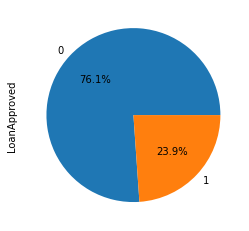

In [12]:
df['LoanApproved'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

15220 (76%) pour la classe 0 et 4780 (24%) pour la classe 1

#### Variable target continue

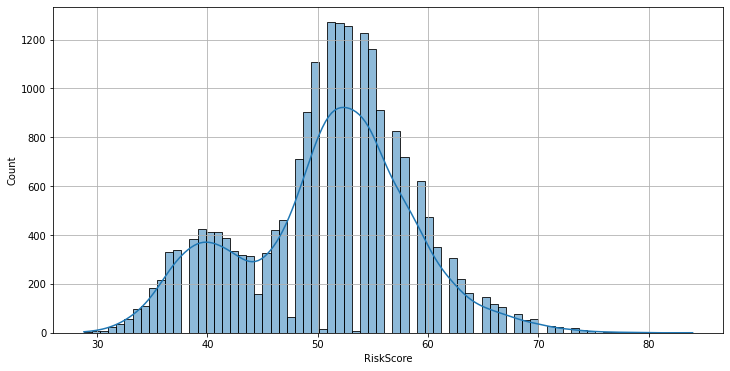

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(df['RiskScore'], kde = True)
plt.grid()
plt.show()

Il semble y'avoir deux distributions. Comparons les distributions selon les valeurs de 'LoanApproved'.

In [14]:
positive = df['LoanApproved'] == 1
negative = df['LoanApproved'] == 0

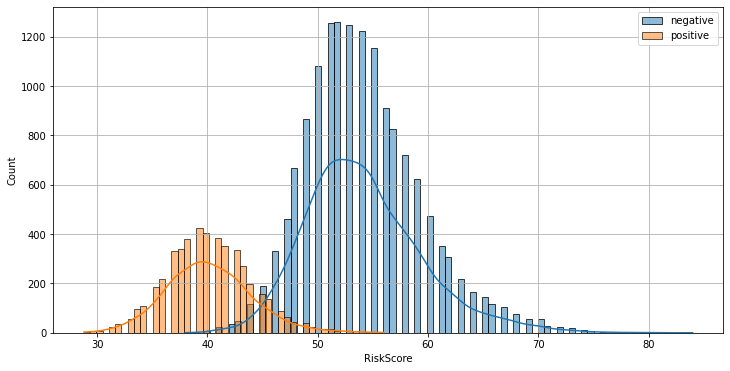

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df[negative]['RiskScore'], kde = True, label='negative')
sns.histplot(df[positive]['RiskScore'], kde = True, label='positive')
plt.grid()
plt.legend()
plt.show()

Il y a bien deux groupes distincts selon les valeurs de 'LoanApproved'. Testons cela.

In [16]:
from scipy.stats import ks_2samp
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats
import numpy as np

Avec un test KS à deux échantillons à 5%, on teste les hypothèses suivantes :

**H0 :** Les deux échantillons ont la même loi

**H1 :** Les deux échantillons ont des lois différents

In [17]:
T, pval = ks_2samp(df[negative]['RiskScore'], df[positive]['RiskScore'])
if pval < 0.05:
    print(f'pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
else:
    print(f'pval : {pval:.4f} \033[1m0\033[0m')

pval : 0.0000 H0 rejetée


**Les distributions sont significativment différentes à $\alpha = 5\%$**

Avec un test de Lilliefor à 5%, on teste les hypothèses suivantes :

**H0 :** La distribution de classe 'negative' suit une loi normale

**H1 :** La distribution ne suit pas une loi normale

In [18]:
T, pval = lilliefors(df[negative]['RiskScore'])
if pval < 0.05:
    print(f'pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
else:
    print(f'pval : {pval:.4f} \033[1m0\033[0m')

pval : 0.0010 H0 rejetée


Avec un test de Lilliefor à 5%, on teste les hypothèses suivantes :

**H0 :** La distribution de classe 'positive' suit une loi normale

**H1 :** La distribution ne suit pas une loi normale

In [19]:
T, pval = lilliefors(df[positive]['RiskScore'])
if pval < 0.05:
    print(f'pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
else:
    print(f'pval : {pval:.4f} \033[1m0\033[0m')

pval : 0.0010 H0 rejetée


On rejette H1 deux fois, **les distributions ne suivent pas une loi normale ($\alpha =5\%$).**

Il est peut-être possible de fit une loi normale asymétrique, c'est à vérifier.

### Signification des variables

Les variables discrètes soulignées ont un support borné avec peu de valeurs

| Variable                     | Type            | Description                                                                 |
|------------------------------|-----------------|-----------------------------------------------------------------------------|
| `ApplicationDate`             | **Catégorielle**    | Date de la demande de prêt **(problème potentiel, semble être un index)**        |
| `Age`                         | **Discrète**    | Âge du demandeur de prêt                                                     |
| `AnnualIncome`                | **Discrète**    | Revenu annuel                                                               |
| `CreditScore`                 | **Discrète**    | Score de capacité de remboursement                                           |
| `EmploymentStatus`            | **Catégorielle**| Statut professionnel (employé, chômeur, etc.)                          |
| `EducationLevel`              | **Catégorielle**| Niveau d'éducation (Licence, Master, etc.)                                  |
| `Experience`                  | **Discrète**    | Nombre d'années d'expérience professionnelle                                 |
| `LoanAmount`                  | **Discrète**    | Taille du prêt souhaité                                                      |
| `LoanDuration`                | **Discrète**    | Durée de remboursement du prêt (probablement en mois)                        |
| `MaritalStatus`               | **Catégorielle**| Situation familiale (célibataire, marié, etc.)                         |
| `NumberOfDependents`          | <u>**Discrète**</u>    | Nombre de personnes à charge                                                 |
| `HomeOwnershipStatus`         | **Catégorielle**| Situation par rapport au logement (propriétaire, locataire, etc.)       |
| `MonthlyDebtPayments`         | **Discrète**    | Paiements mensuels de dettes                                                 |
| `CreditCardUtilizationRate`   | **Continue**    | Taux d'utilisation de la carte de crédit                                     |
| `NumberOfOpenCreditLines`     | <u>**Discrète**</u>    | Nombre de lignes de crédit actives                                           |
| `NumberOfCreditInquiries`     | <u>**Discrète**</u>    | Nombre de demandes de crédit                                                 |
| `DebtToIncomeRatio`           | **Continue**    | Ratio d'endettement : $100 * \dfrac{\text{Total des paiements mensuels de dettes}}{\text{Revenu mensuel brut}}$ |
| `BankruptcyHistory`           | **Catégorielle**| Historique de faillite (1/0)                                           |
| `LoanPurpose`                 | **Catégorielle**| But du prêt (éducation, logement, consommation, etc.)                  |
| `PreviousLoanDefaults`        | **Catégorielle**    | Prêts précédemment impayés ?                                           |
| `PaymentHistory`              | **Discrète**| Historique des paiements                                                        |
| `LengthOfCreditHistory`       | **Discrète**    | Durée d'utilisation du crédit                                                |
| `SavingsAccountBalance`       | **Discrète**    | Solde du compte d'épargne                                                    |
| `CheckingAccountBalance`      | **Discrète**    | Solde du compte courant                                                      |
| `TotalAssets`                 | **Discrète**    | Valeur totale de tous les biens possédés                                     |
| `TotalLiabilities`            | **Discrète**    | Total des dettes ou obligations financières                                  |
| `MonthlyIncome`               | **Continue**    | Revenu mensuel                                                              |
| `UtilityBillsPaymentHistory`  | **Continue**| Historique des paiements des factures de services publics                    |
| `JobTenure`                   | **Discrète**    | Durée de l'ancienneté professionnelle                                        |
| `NetWorth`                    | **Discrète**    | Valeur nette : `TotalAssets - TotalLiabilities`                              |
| `BaseInterestRate`            | **Continue**    | Taux de base utilisé pour le calcul des intérêts                             |
| `InterestRate`                | **Continue**    | Taux d'intérêt                                                                |
| `MonthlyLoanPayment`          | **Continue**    | Montant à payer chaque mois pour rembourser le prêt                          |
| `TotalDebtToIncomeRatio`      | **Continue**    | Version étendue du DTI                                                       |


### Analyse des variables

#### Variables discrètes

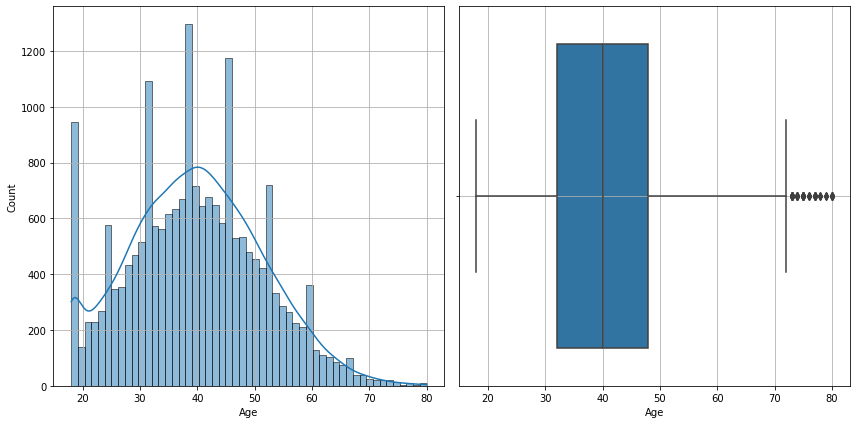

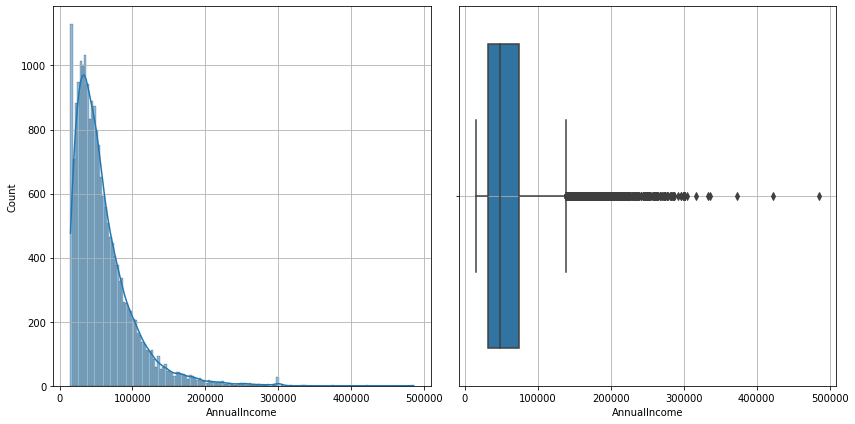

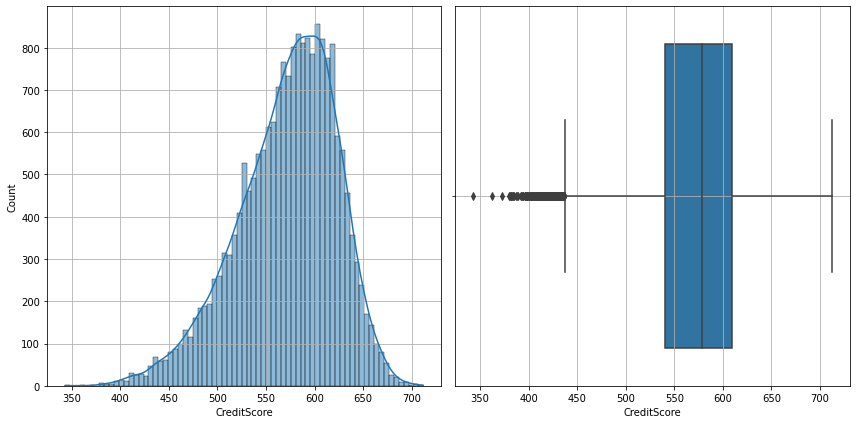

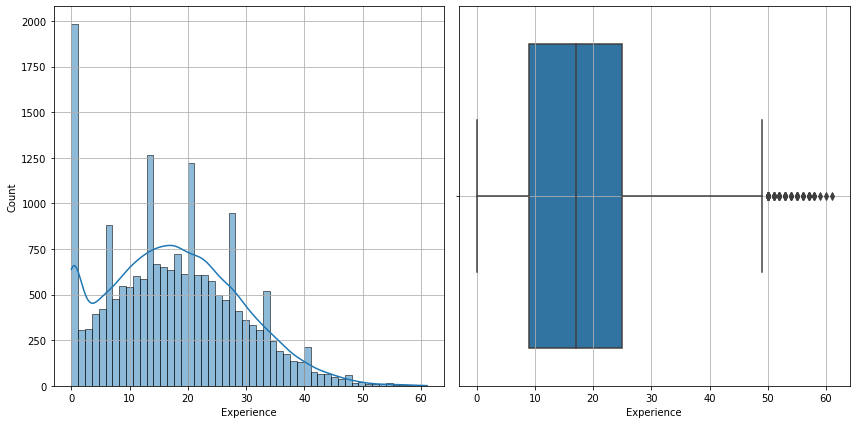

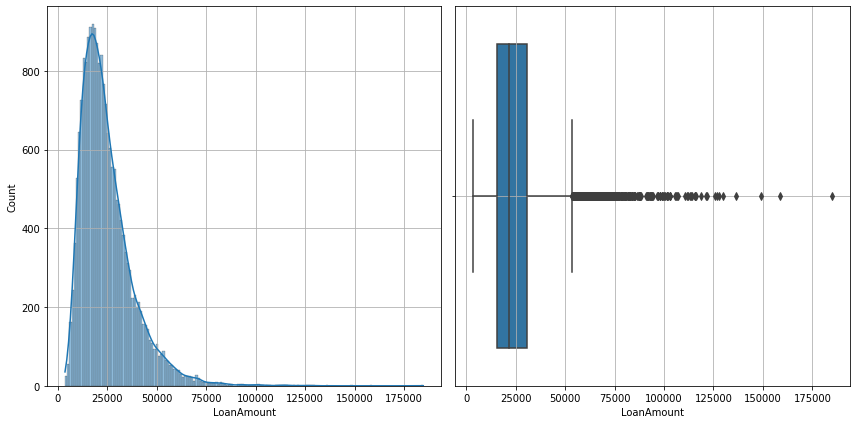

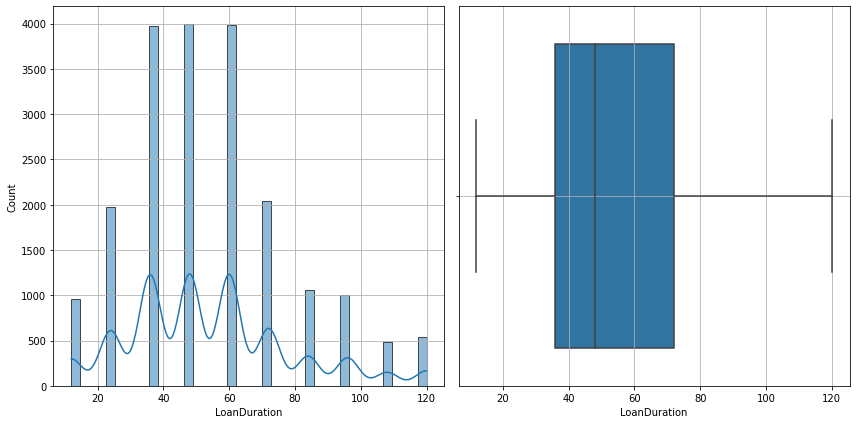

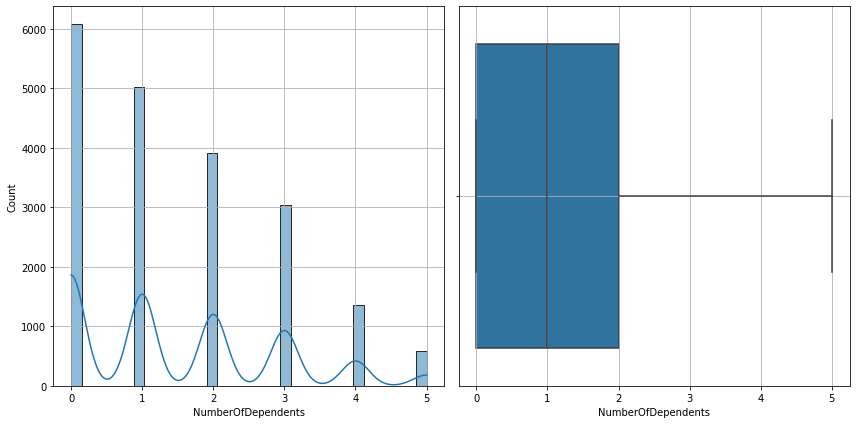

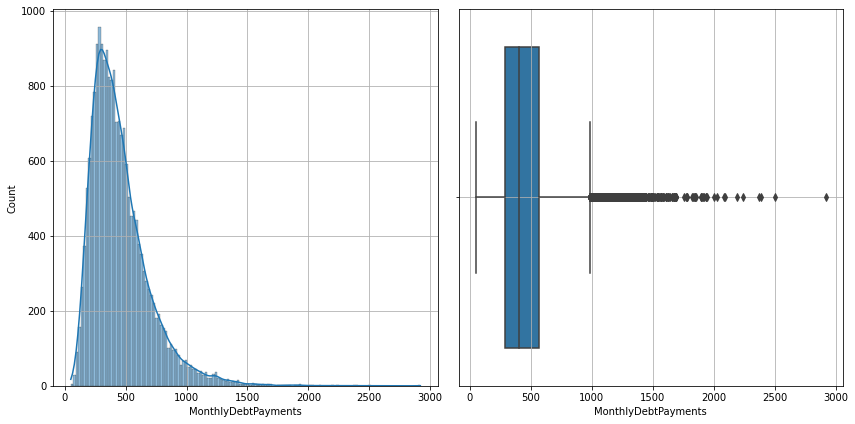

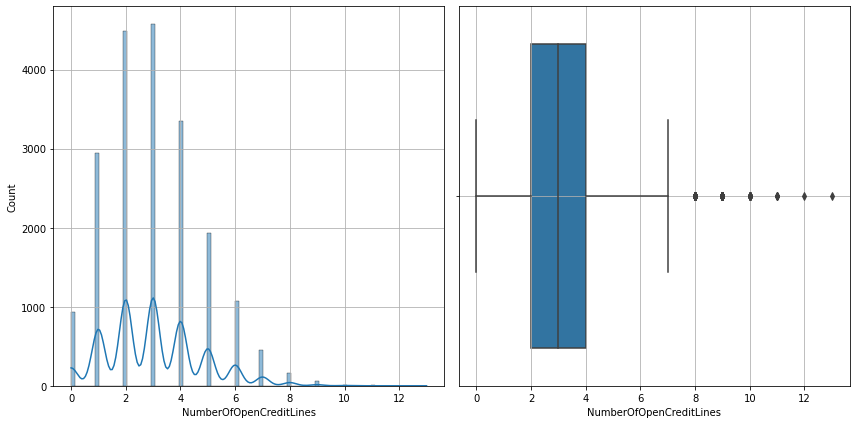

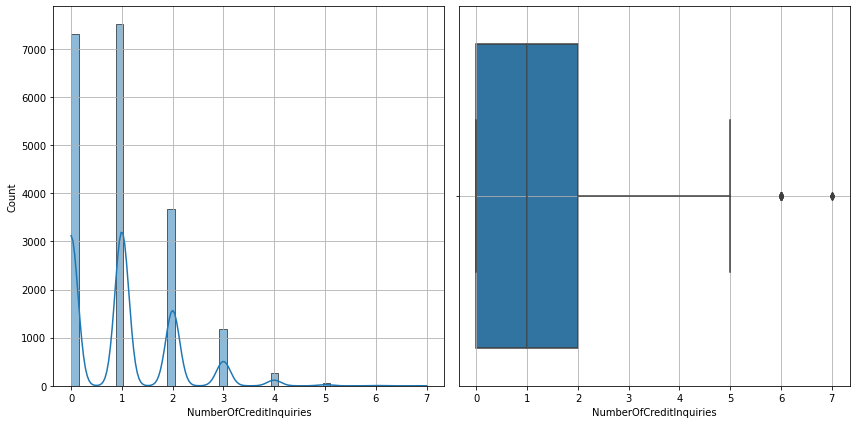

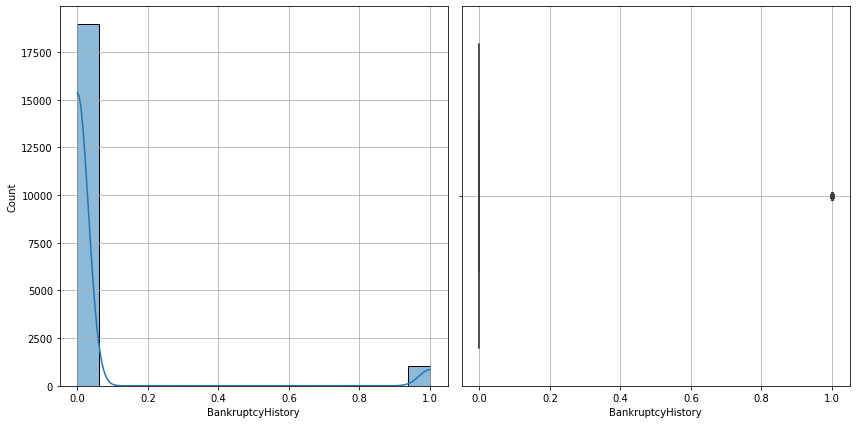

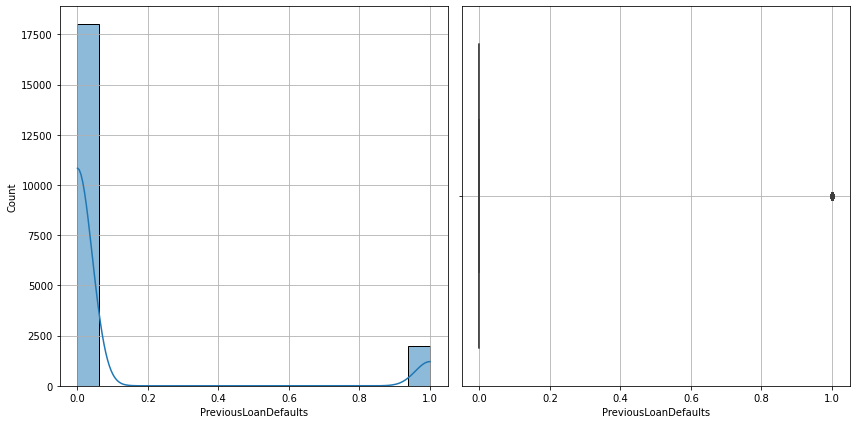

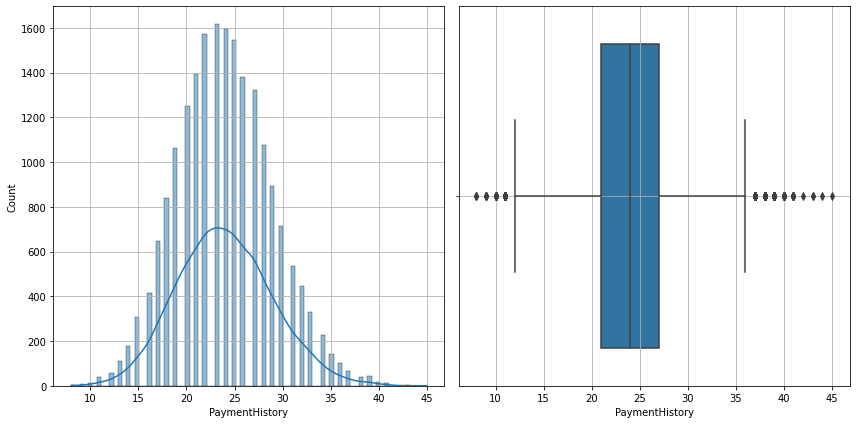

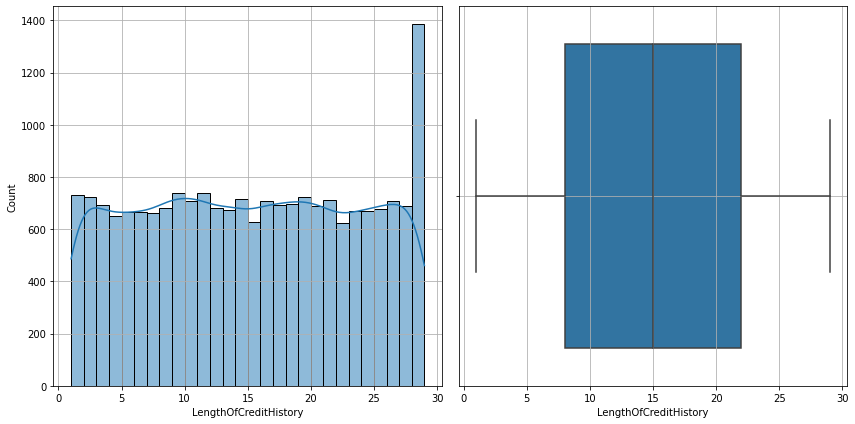

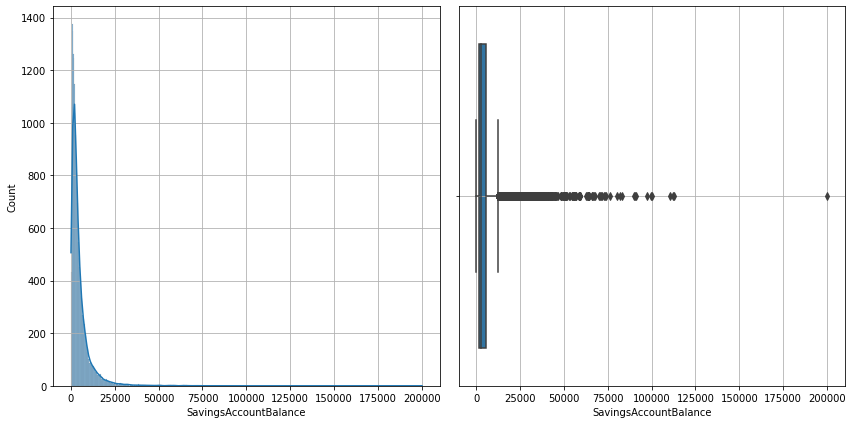

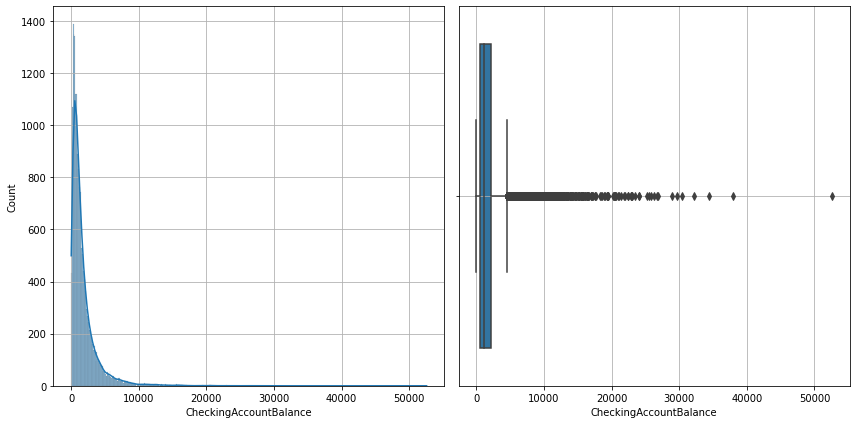

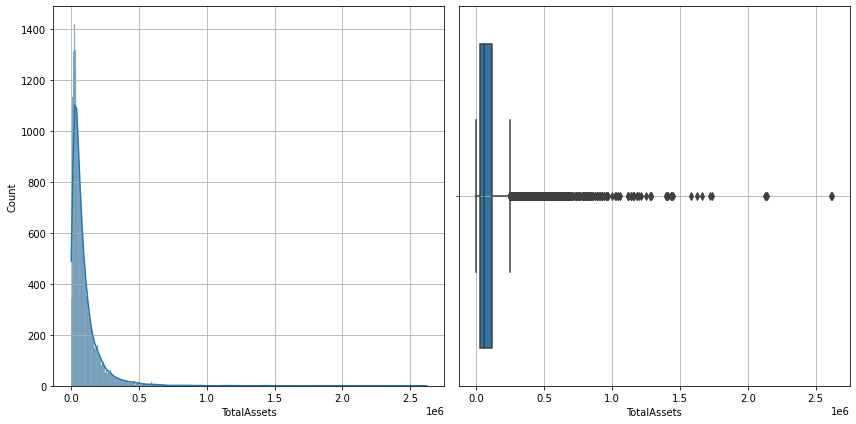

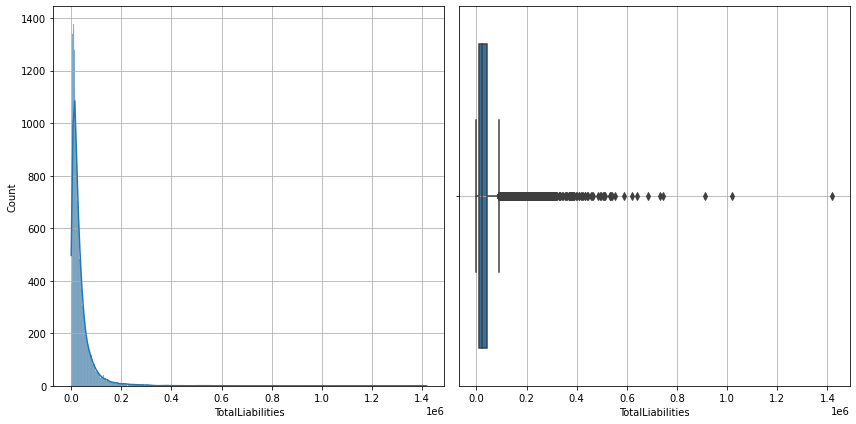

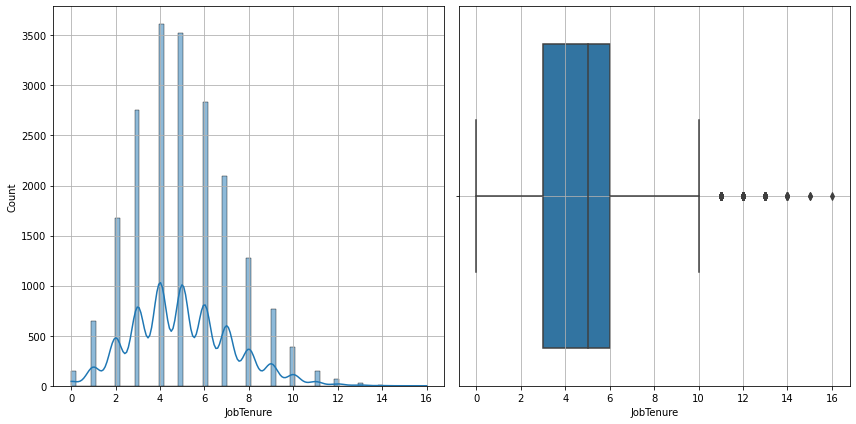

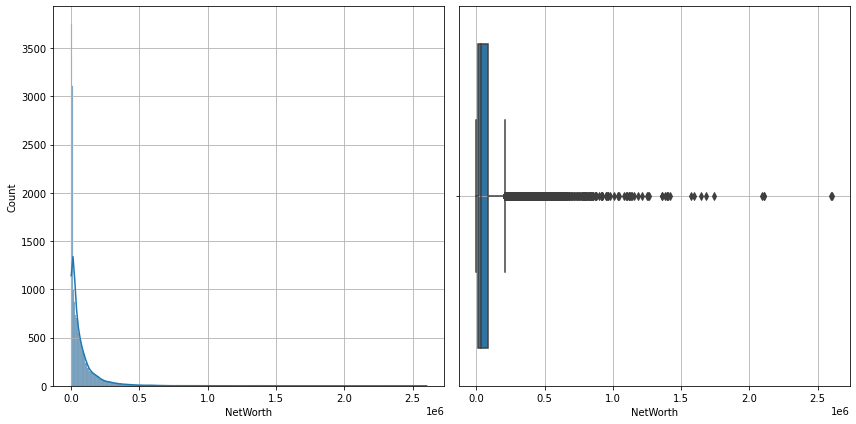

In [20]:
for col in integer_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].grid(True)

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].grid(True)
    plt.tight_layout()
    plt.show()

- Certaines variables (notamment financières) peuvent suivre des **lois log-normales.** C'est le cas de 'AnnualIncome', 'LoanAmount', 'MonthlyDebtPayments', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth'
- 'LengthOfCreditHistory' semble suivre une **loi uniforme**
- 'CreditScore' peut suivre une **loi normale asymétrique**
- Il y a des **outliers**, le plus souvent ce sont des individus beaucoup plus riches, qui demandent plus d'argent qui la moyenne. Il y en a aussi pour le score de capacité de remboursement
- Certaines variables discrètes ont un support avec peu de valeurs et il faudrait les représenter autrement

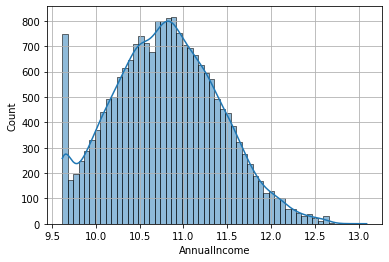

AnnualIncome---------------------------- pval : 0.0010 H0 rejetée


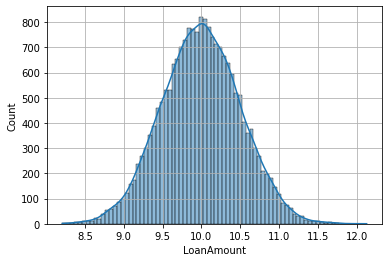

LoanAmount------------------------------ pval : 0.8642 0


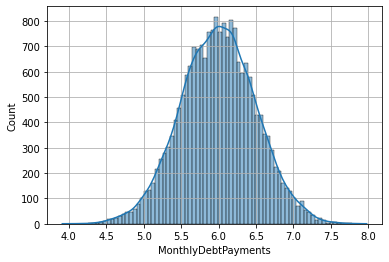

MonthlyDebtPayments--------------------- pval : 0.0937 0


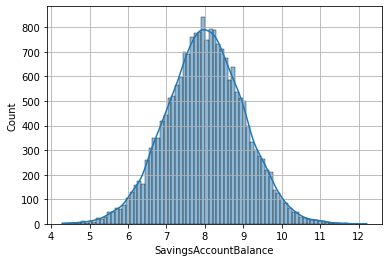

SavingsAccountBalance------------------- pval : 0.0401 0


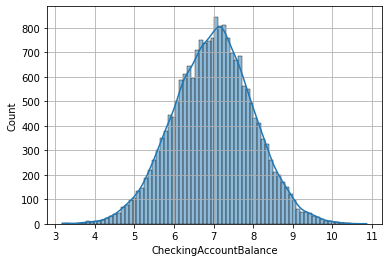

CheckingAccountBalance------------------ pval : 0.0010 H0 rejetée


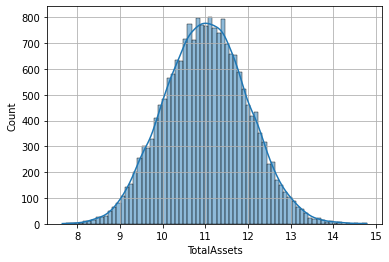

TotalAssets----------------------------- pval : 0.0388 0


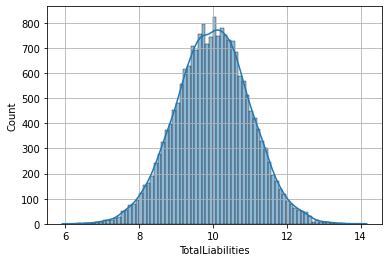

TotalLiabilities------------------------ pval : 0.3791 0


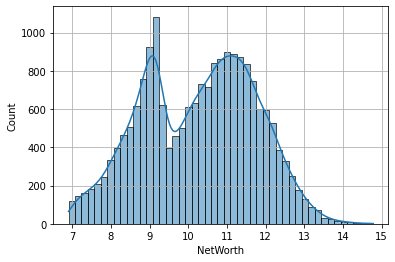

NetWorth-------------------------------- pval : 0.0010 H0 rejetée


In [21]:
cols = ['AnnualIncome', 'LoanAmount', 'MonthlyDebtPayments', 
        'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth']
for col in cols:
    sns.histplot(np.log(df[col]), kde=True)
    plt.grid()
    plt.show()
    alpha = 0.05
    alpha_bonf = alpha/len(cols)
    T, pval = lilliefors(np.log(df[col]))
    if pval < alpha_bonf:
        print(f'{col:-<40} pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
    else:
        print(f'{col:-<40} pval : {pval:.4f} \033[1m0\033[0m')

On peut supposer que les variables 'LoanAmount', 'MonthlyDebtPayments', 'SavingsAccountBalance', 'TotalAssets', 'TotalLiabilities' suivent des lois log-normales.

 alpha = -2.8645384269939687 loc = 630.1635037804081 scale = 77.64554693477317


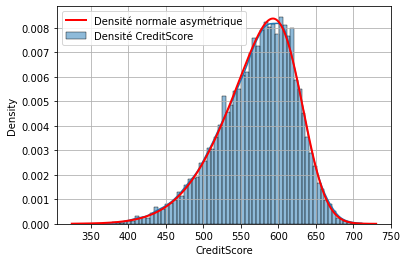

In [22]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skewnorm

alpha, loc, scale = skewnorm.fit(df['CreditScore'])
print(f' alpha = {alpha} loc = {loc} scale = {scale}')
sns.histplot(df['CreditScore'], stat='density', kde=True, label='Densité CreditScore')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = skewnorm.pdf(x, alpha, loc, scale)
plt.plot(x, p, color ='red', label='Densité normale asymétrique', linewidth=2)
plt.xlabel('CreditScore')
plt.grid()
plt.legend()
plt.show()

Le paramètre alpha est significativement différent de 0. Une loi normale asymétrique fit vraiment bien avec les données 'CreditScore'.

#### Variables continues

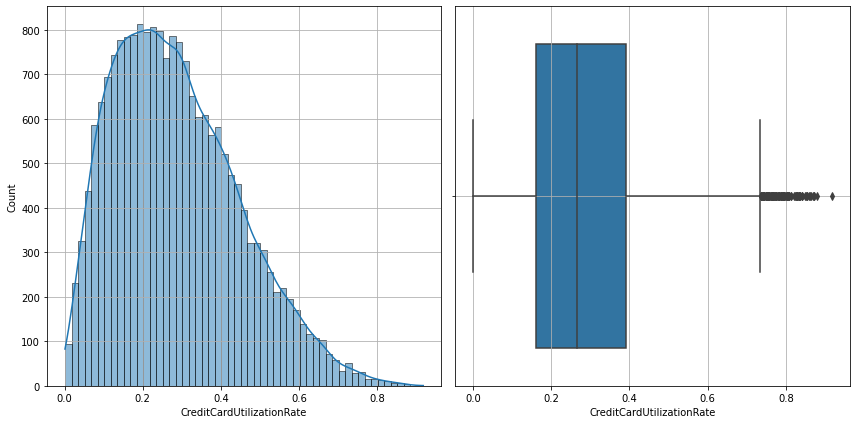

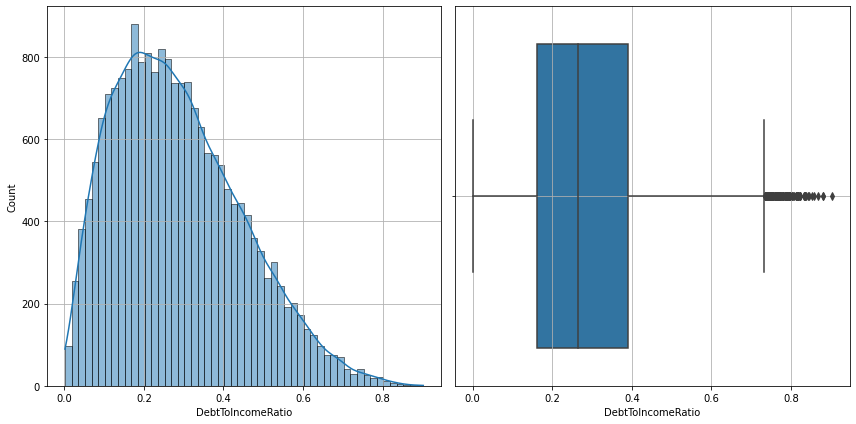

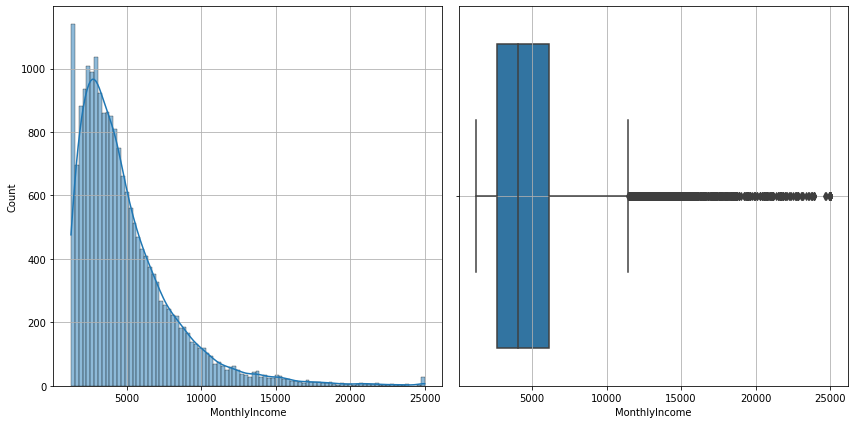

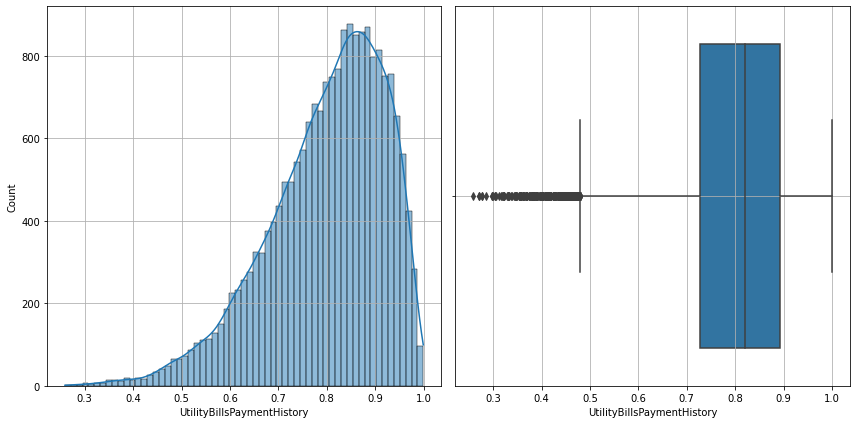

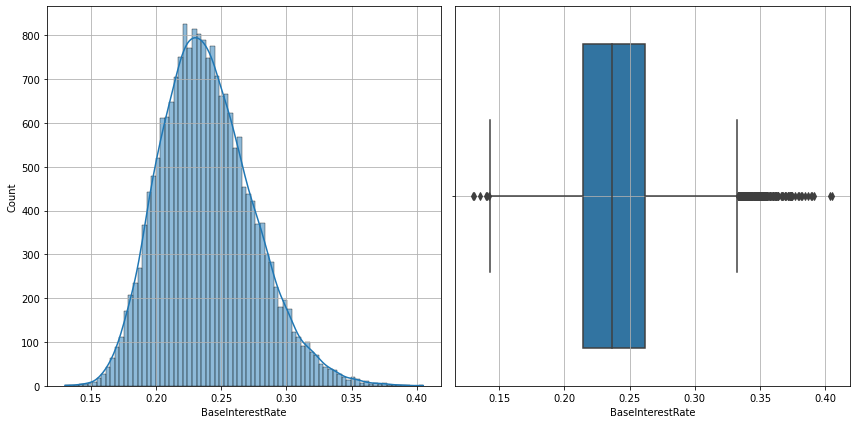

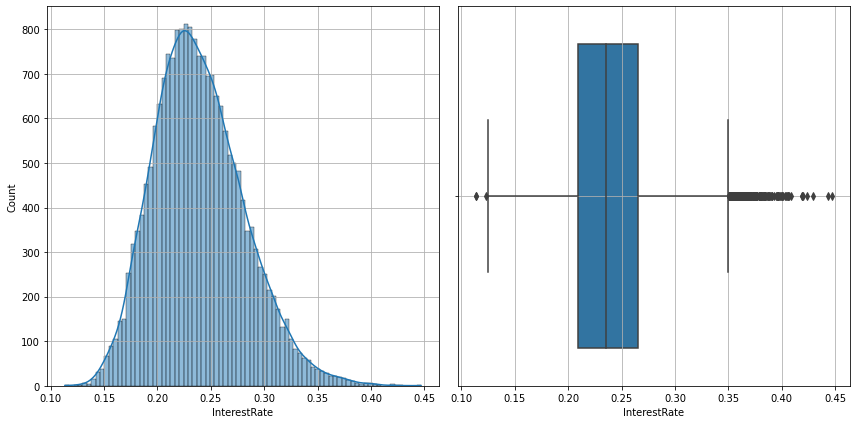

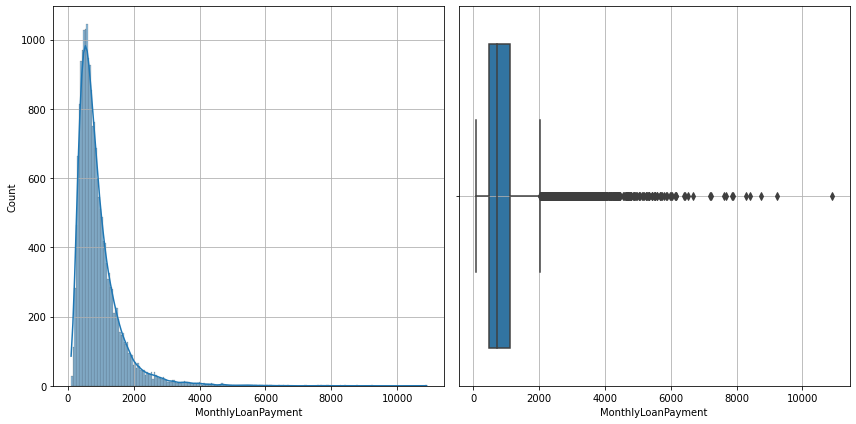

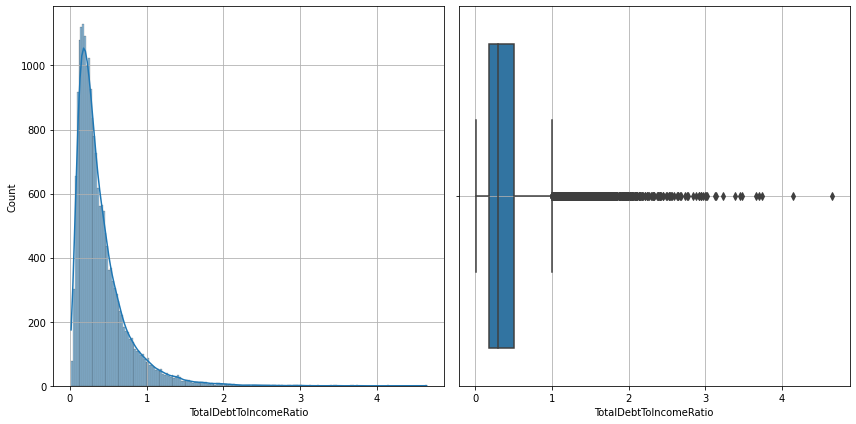

In [23]:
for col in continuous_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].grid(True)

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].grid(True)
    plt.tight_layout()
    plt.show()

- Certaines variables peuvent suivre des **lois log-normales** : 'MonthlyIncome', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio'
- Les variables 'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'UtilityBillsPaymentHistory', 'BaseInterestRate', 'InterestRate' peuvent suivre des **lois normales asymétriques**
- Beaucoup d'**outliers** encore

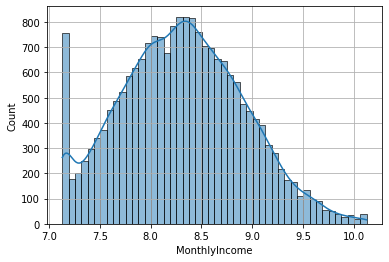

MonthlyIncome--------------------------- pval : 0.0010 H0 rejetée


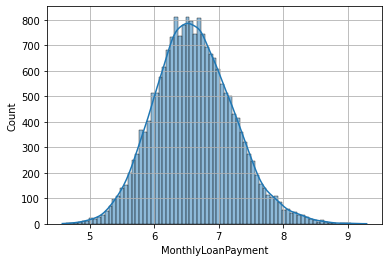

MonthlyLoanPayment---------------------- pval : 0.0010 H0 rejetée


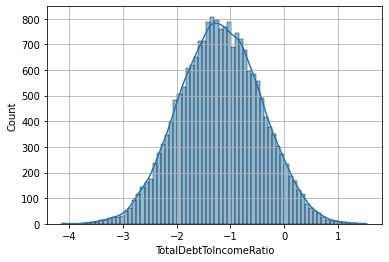

TotalDebtToIncomeRatio------------------ pval : 0.0070 H0 rejetée


In [24]:
cols = ['MonthlyIncome', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio']
for col in cols:
    sns.histplot(np.log(df[col]), kde=True)
    plt.grid()
    plt.show()
    alpha = 0.05
    alpha_bonf = alpha/len(cols)
    T, pval = lilliefors(np.log(df[col]))
    if pval < alpha_bonf:
        print(f'{col:-<40} pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
    else:
        print(f'{col:-<40} pval : {pval:.4f} \033[1m0\033[0m')

Les résultats des tests nous incitent à ne pas supposer que les variables précédentes suivent des lois log-normales.

CreditCardUtilizationRate alpha = 5.731993825991451 loc = 0.07279518577431865 scale = 0.26674233162757754


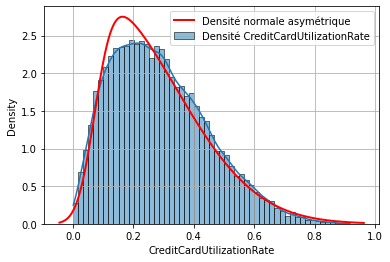

DebtToIncomeRatio alpha = 5.731877626906245 loc = 0.07155835071836064 scale = 0.26746543499466136


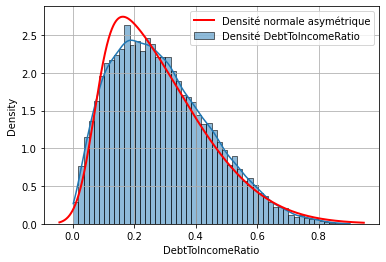

UtilityBillsPaymentHistory alpha = 0.00032291620491439277 loc = 0.7998864075845605 scale = 0.12066192500722894


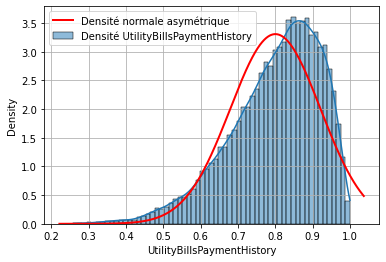

BaseInterestRate alpha = 2.0868542888439374 loc = 0.20226069231612798 scale = 0.05118416344421666


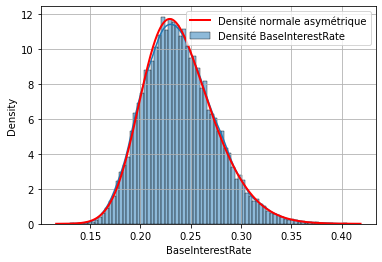

InterestRate alpha = 2.1659919164329535 loc = 0.19467687510267218 scale = 0.061282612300492104


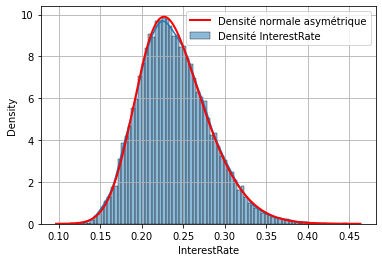

In [25]:
cols = ['CreditCardUtilizationRate', 'DebtToIncomeRatio', 'UtilityBillsPaymentHistory', 'BaseInterestRate', 'InterestRate']
for col in cols:
    alpha, loc, scale = skewnorm.fit(df[col])
    print(f'{col} alpha = {alpha} loc = {loc} scale = {scale}')
    sns.histplot(df[col], stat='density', kde=True, label=f'Densité {col}')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)
    p = skewnorm.pdf(x, alpha, loc, scale)
    plt.plot(x, p, color ='red', label='Densité normale asymétrique', linewidth=2)
    plt.xlabel(col)
    plt.grid()
    plt.legend()
    plt.show()

On peut fit des loi normales asymétriques sur 'BaseInterestRate' et 'InterestRate'. Peut-être une loi gamma ou beta (le support est [0,1]) sur les deux premières variables.

CreditCardUtilizationRate (Gamma): shape = 3.885391318806496, loc = -0.040179502544850525, scale = 0.08404826875864718
CreditCardUtilizationRate (Beta): alpha = 2.0052564417124468, beta = 4.995332250687228, loc = 0, scale = 1


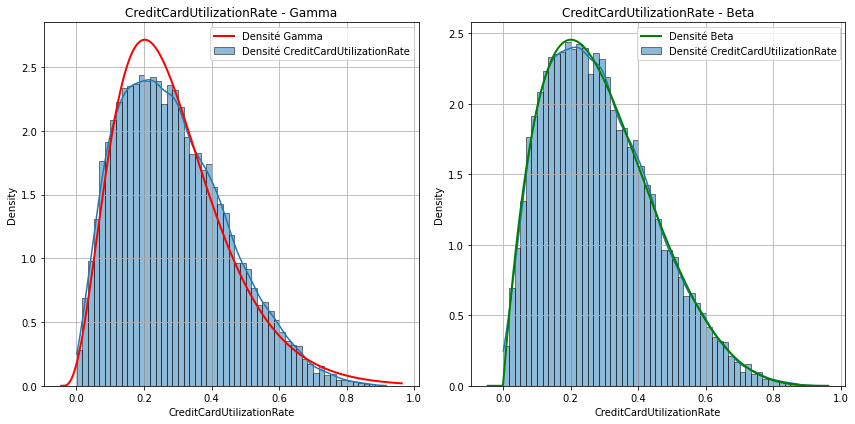

DebtToIncomeRatio (Gamma): shape = 3.8300623238170335, loc = -0.03980423429212032, scale = 0.08499575321977072
DebtToIncomeRatio (Beta): alpha = 1.9831247422139728, beta = 4.958535085150629, loc = 0, scale = 1


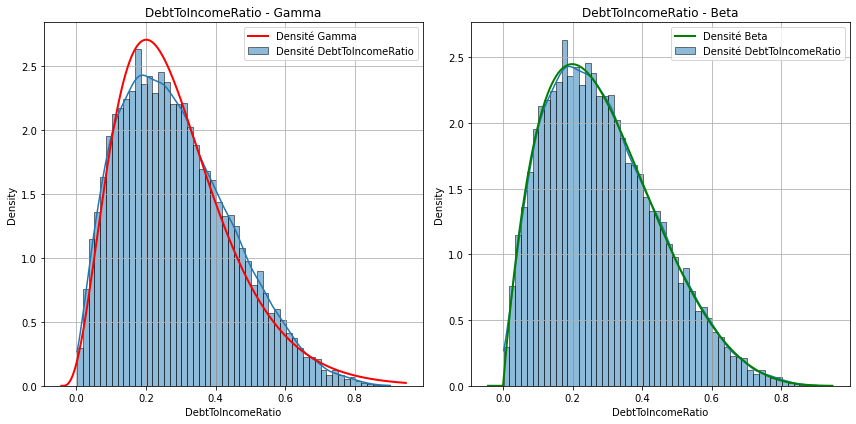

In [26]:
from scipy.stats import gamma
from scipy.stats import beta

cols = ['CreditCardUtilizationRate', 'DebtToIncomeRatio']

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    shape_gamma, loc_gamma, scale_gamma = gamma.fit(df[col])
    print(f'{col} (Gamma): shape = {shape_gamma}, loc = {loc_gamma}, scale = {scale_gamma}')
    
    sns.histplot(df[col], stat='density', kde=True, ax=axes[0], label=f'Densité {col}')
    xmin, xmax = axes[0].get_xlim()
    x = np.linspace(xmin, xmax, 1000)
    p_gamma = gamma.pdf(x, shape_gamma, loc_gamma, scale_gamma)
    axes[0].plot(x, p_gamma, color='red', label='Densité Gamma', linewidth=2)
    axes[0].set_title(f'{col} - Gamma')
    axes[0].set_xlabel(col)
    axes[0].grid()
    axes[0].legend()

    a_beta, b_beta, loc_beta, scale_beta = beta.fit(df[col], floc=0, fscale=1)
    print(f'{col} (Beta): alpha = {a_beta}, beta = {b_beta}, loc = {loc_beta}, scale = {scale_beta}')
    
    sns.histplot(df[col], stat='density', kde=True, ax=axes[1], label=f'Densité {col}')
    p_beta = beta.pdf(x, a_beta, b_beta, loc_beta, scale_beta)
    axes[1].plot(x, p_beta, color='green', label='Densité Beta', linewidth=2)
    axes[1].set_title(f'{col} - Beta')
    axes[1].set_xlabel(col)
    axes[1].grid()
    axes[1].legend()
    plt.tight_layout()
    plt.show()

Une loi beta fit beaucoup mieux sur ces 2 variables.

### Les distributions asymétriques peuvent mettre en évidence des sous groupes/classes dans les données

#### Variables catégorielles

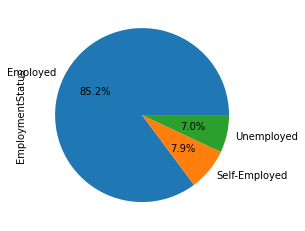

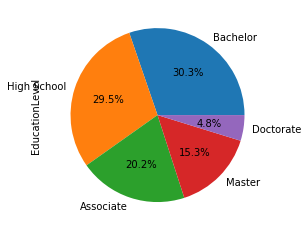

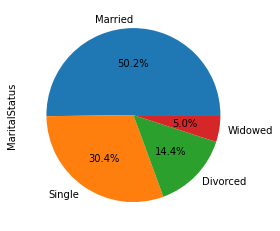

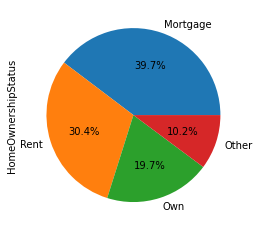

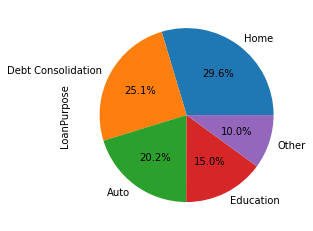

In [27]:
for col in categorial_features[1:]:
    plt.figure()
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.show()

### Relations variables/target

#### Variables discrètes

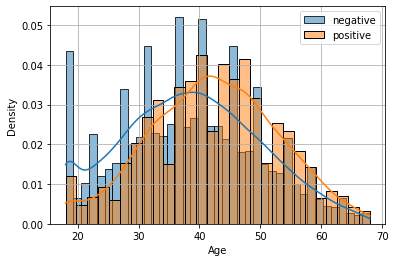

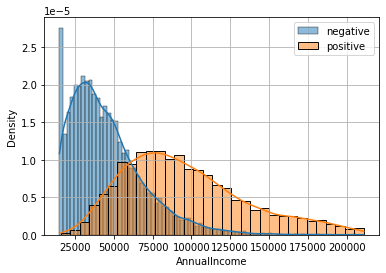

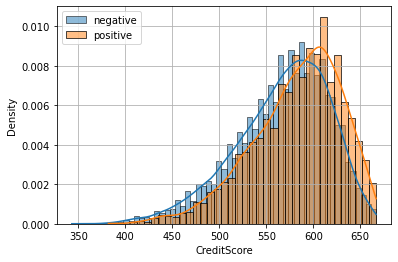

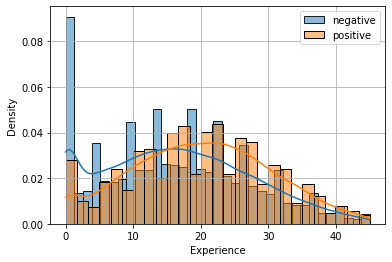

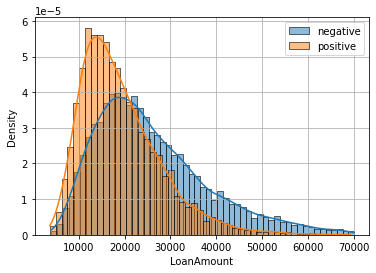

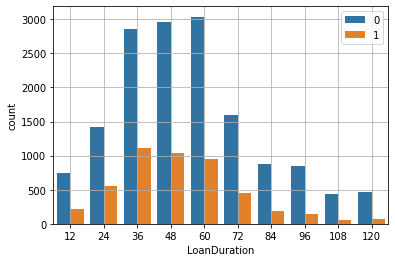

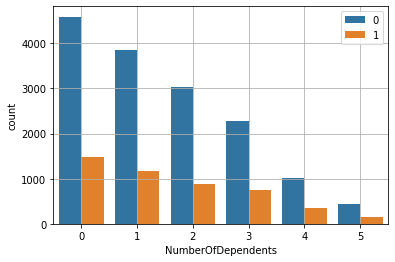

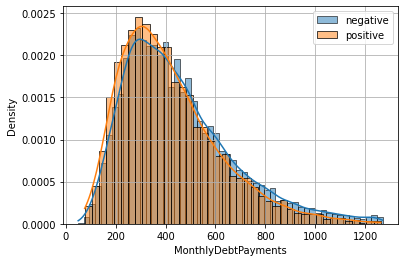

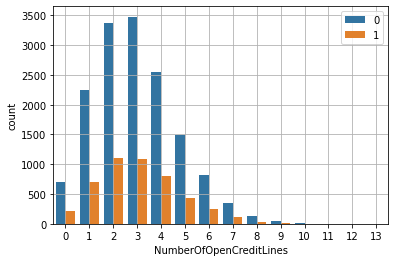

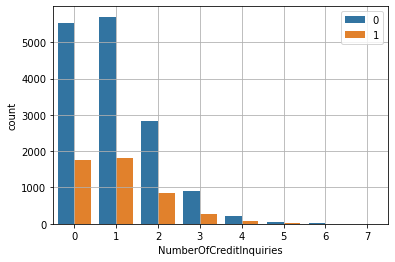

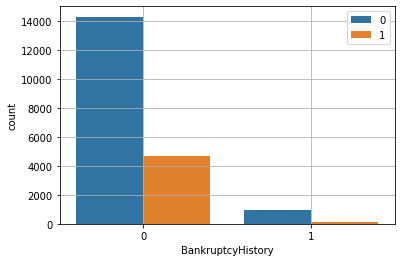

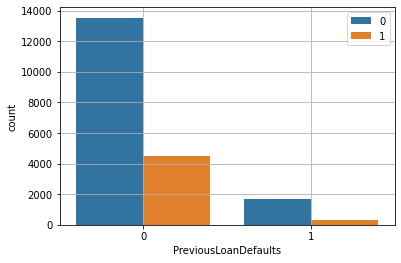

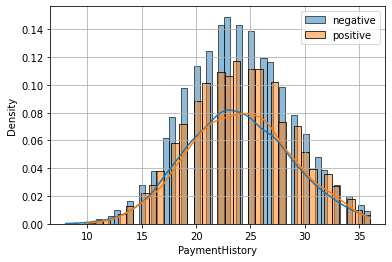

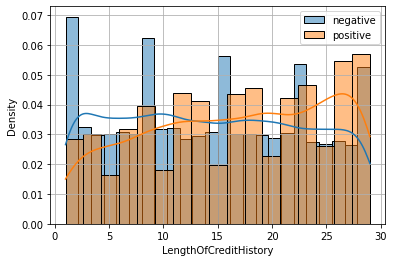

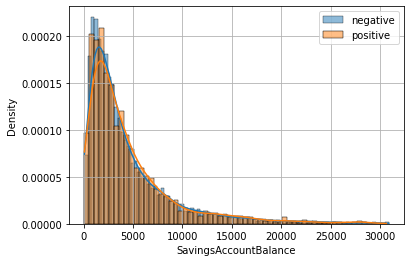

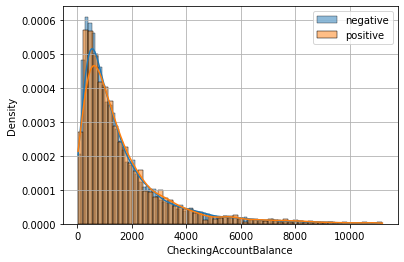

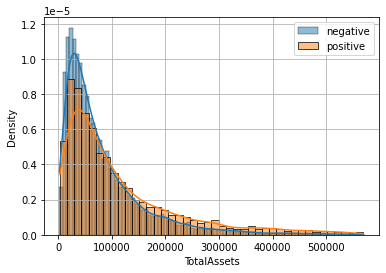

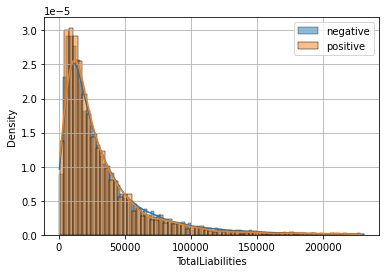

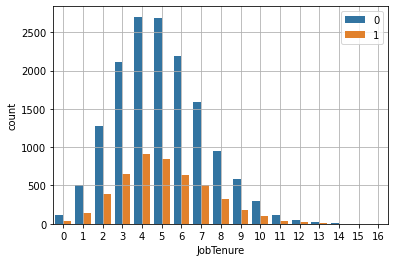

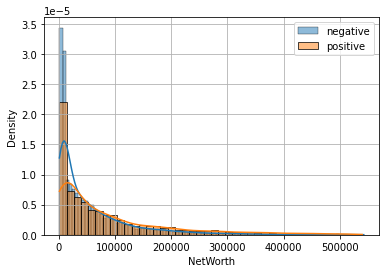

In [32]:
for col in integer_features:    
    plt.figure()
    upper_limit = df[col].quantile(0.99) # Ne pas écraser le graphique à cause des outliers
    
    if len(np.unique(df[col])) > 20:
        sns.histplot(df[(negative) & (df[col] <= upper_limit)][col], kde=True, label='negative', stat='density')
        sns.histplot(df[(positive) & (df[col] <= upper_limit)][col], kde=True, label='positive', stat='density')
    else:
        sns.countplot(x=col, hue='LoanApproved', data=df)
    plt.grid()
    plt.legend()
    plt.show()

Par rapport aux individus n'ayant pas reçu de prêt, les inidividus qui ont reçu un prêt sont souvent plus agés, gagnent souvent plus d'argent, ont un score de remboursement plus élevé, demandent moins d'argent en général, n'ont presque jamais eu de retard de paiement ou été en faillite, demandent un prêt pour une durée de 2 à 6 ans globalement.
C'est étrange qu'il y ait un pic autour de 12500 pour la variable 'NetWorth' pour les individus ayant un prêt accepté. 

On peut tester si les individus de la classe positive de la variable 'MonthlyDebtPayments' ont la même loi que ceux de la classe negative.

Avec un test KS à deux échantillons à 5%, on teste les hypothèses suivantes :

**H0 :** Les deux échantillons ont la même loi

**H1 :** Les deux échantillons ont des lois différents

In [148]:
T, pval = ks_2samp(df[negative]['MonthlyDebtPayments'], df[positive]['MonthlyDebtPayments'])
if pval < 0.05:
    print(f'pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
else:
    print(f'pval : {pval:.4f} \033[1m0\033[0m')

pval : 0.0000 H0 rejetée


#### Variables continues

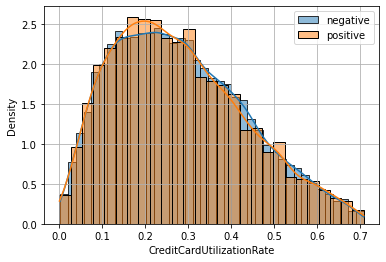

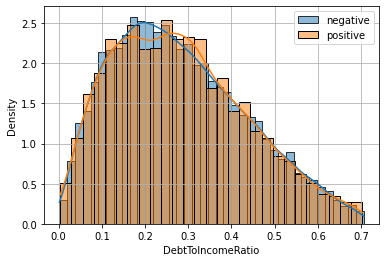

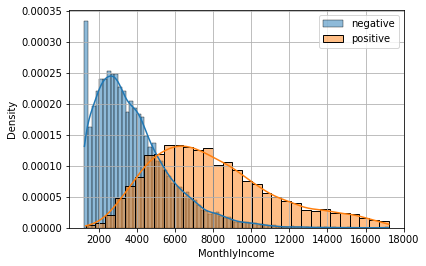

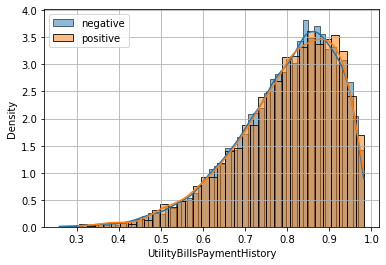

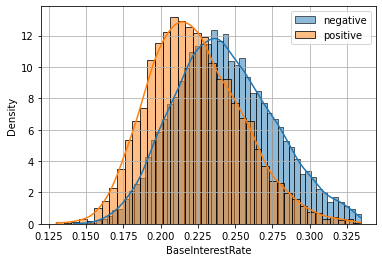

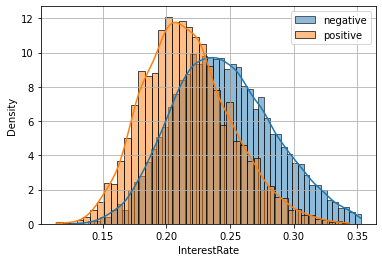

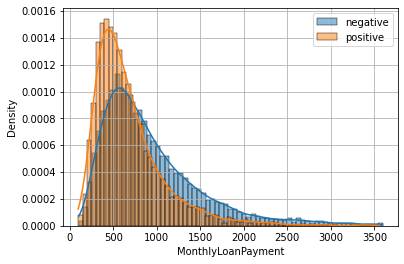

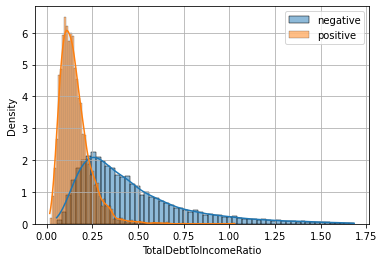

In [33]:
for col in continuous_features:    
    plt.figure()
    upper_limit = df[col].quantile(0.99) # Ne pas écraser le graphique à cause des outliers
    
    if len(np.unique(df[col])) > 20:
        sns.histplot(df[(negative) & (df[col] <= upper_limit)][col], kde=True, label='negative', stat='density')
        sns.histplot(df[(positive) & (df[col] <= upper_limit)][col], kde=True, label='positive', stat='density')
    else:
        sns.countplot(x=col, hue='LoanApproved', data=df)
    plt.grid()
    plt.legend()
    plt.show()

Par rapport aux individus n'ayant pas reçu de prêt, les individus qui ont reçu un prêt ont souvent des intérêts plus bas, un remboursement mensuel du prêt plus bas et un 'TotalDebtIncomeRatio' proche de 0. **À noter qu'on ne distingue pas deux distributions significativement différentes dans la variable 'DebtToIncomeRatio' et que, pour la classe positive, 'TotalDebtIncomeRatio' est en moyenne plus bas que 'DebtToIncomeRatio' ce qui est étrange car il est censé y avoir plus de dettes.**

On peut tester si les individus de la classe positive de la variable 'DebtToIncomeRatio' ont la même loi que ceux de la classe negative.

Avec un test KS à deux échantillons à 5%, on teste les hypothèses suivantes :

**H0 :** Les deux échantillons ont la même loi

**H1 :** Les deux échantillons ont des lois différents

In [34]:
T, pval = ks_2samp(df[negative]['DebtToIncomeRatio'], df[positive]['DebtToIncomeRatio'])
if pval < 0.05:
    print(f'pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
else:
    print(f'pval : {pval:.4f} \033[1m0\033[0m')

pval : 0.3399 0


On peut raisonnablement penser que les deux populations de la variable 'DebtToIncomeRatio' suivent la même loi beta ajustée précédemment :

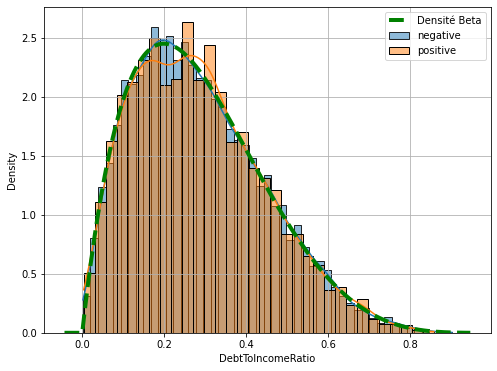

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(df[(negative) & (df[col] <= upper_limit)]['DebtToIncomeRatio'], kde=True, label='negative', stat='density')
sns.histplot(df[(positive) & (df[col] <= upper_limit)]['DebtToIncomeRatio'], kde=True, label='positive', stat='density')
plt.plot(x, p_beta, color='green', label='Densité Beta', linewidth=4, ls='--')
plt.grid()
plt.legend()
plt.show()

Un résultat semblable peut surement être trouvé pour la variable 'CreditCardUtilizationRate' :

Avec un test KS à deux échantillons à 5%, on teste les hypothèses suivantes :

**H0 :** Les deux échantillons ont la même loi

**H1 :** Les deux échantillons ont des lois différents

In [36]:
T, pval = ks_2samp(df[negative]['CreditCardUtilizationRate'], df[positive]['CreditCardUtilizationRate'])
if pval < 0.05:
    print(f'pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
else:
    print(f'pval : {pval:.4f} \033[1m0\033[0m')

pval : 0.1451 0


Résultat attendu et il est n'est pas inconcevable de supposer que les sous populations de la variable 'CreditCardUtilizationRate' suivent encore la même loi beta que précédemment :

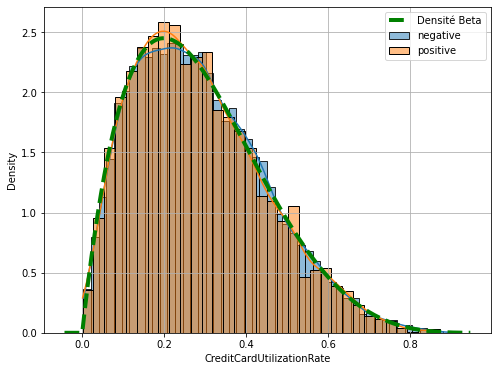

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(df[(negative) & (df[col] <= upper_limit)]['CreditCardUtilizationRate'], kde=True, label='negative', stat='density')
sns.histplot(df[(positive) & (df[col] <= upper_limit)]['CreditCardUtilizationRate'], kde=True, label='positive', stat='density')
plt.plot(x, p_beta, color='green', label='Densité Beta', linewidth=4, ls='--')
plt.grid()
plt.legend()
plt.show()

La densité colle un peu moins bien mais c'est acceptable et étrange, le data set est probablement simulé (après vérification, c'est écrit à la première ligne de la présentation du dataset qu'il est synthétique).

Je suppose que les paramètres pour la loi beta qui a servi à simuler sont $\alpha = 2$ et $\beta = 5$. Vérifions avec un KS test

**H0 :** La variable suit une loi beta(2,5)

**H1 :** La variable ne suit pas une loi beta(2,5)

In [38]:
cols = ['DebtToIncomeRatio', 'CreditCardUtilizationRate']
for col in cols:
    T, pval = stats.kstest(df[col], 'beta', args=(2, 5))
    alpha = 0.05
    if pval < alpha:
        print(f'{col:-<40} pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
    else:
        print(f'{col:-<40} pval : {pval:.4f} \033[1m0\033[0m')

DebtToIncomeRatio----------------------- pval : 0.9420 0
CreditCardUtilizationRate--------------- pval : 0.6133 0


Effectuons la même chose pour la variable 'UtilityBillsPaymentHistory' mais vérifions d'abord que les sous distributions sont significativement différentes :

Avec un test KS à deux échantillons à 5%, on teste les hypothèses suivantes :

**H0 :** Les deux échantillons ont la même loi

**H1 :** Les deux échantillons ont des lois différents

In [39]:
T, pval = ks_2samp(df[negative]['UtilityBillsPaymentHistory'], df[positive]['UtilityBillsPaymentHistory'])
if pval < 0.05:
    print(f'pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
else:
    print(f'pval : {pval:.4f} \033[1m0\033[0m')

pval : 0.4004 0


UtilityBillsPaymentHistory (Beta): alpha = 8.035803638656132, beta = 2.0109930008719714, loc = 0, scale = 1


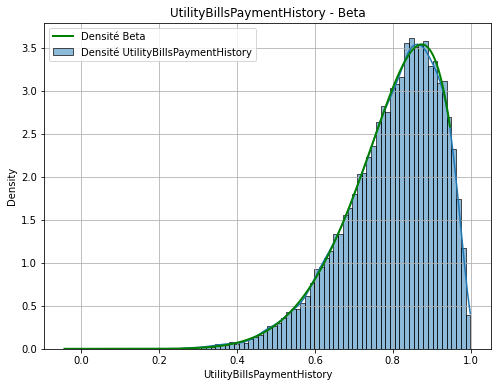

In [40]:
cols = ['UtilityBillsPaymentHistory']

for col in cols:
    plt.figure(figsize=(8,6))

    a_beta, b_beta, loc_beta, scale_beta = beta.fit(df[col], floc=0, fscale=1)
    print(f'{col} (Beta): alpha = {a_beta}, beta = {b_beta}, loc = {loc_beta}, scale = {scale_beta}')
    
    sns.histplot(df[col], stat='density', kde=True, label=f'Densité {col}')
    p_beta = beta.pdf(x, a_beta, b_beta, loc_beta, scale_beta)
    plt.plot(x, p_beta, color='green', label='Densité Beta', linewidth=2)
    plt.title(f'{col} - Beta')
    plt.xlabel(col)
    plt.grid()
    plt.legend()
    plt.show()

**H0 :** La variable 'UtilityBillsPaymentHistory' suit une loi beta(8,2)

**H1 :** La variable 'UtilityBillsPaymentHistory' ne suit pas une loi beta(8,2)

In [41]:
cols = ['UtilityBillsPaymentHistory']
for col in cols:
    T, pval = stats.kstest(df[col], 'beta', args=(8, 2))
    alpha = 0.05
    if pval < alpha:
        print(f'{col:-<40} pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
    else:
        print(f'{col:-<40} pval : {pval:.4f} \033[1m0\033[0m')

UtilityBillsPaymentHistory-------------- pval : 0.9656 0


#### Variables catégorielles

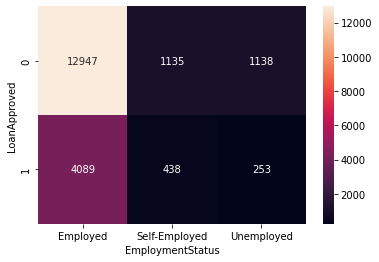

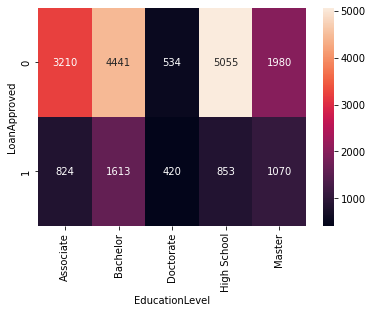

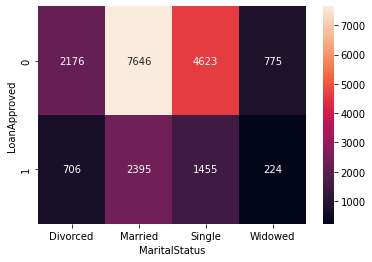

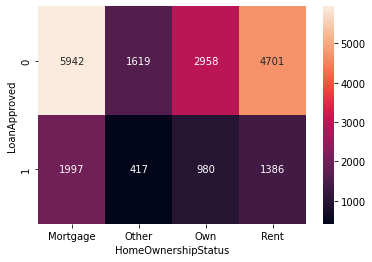

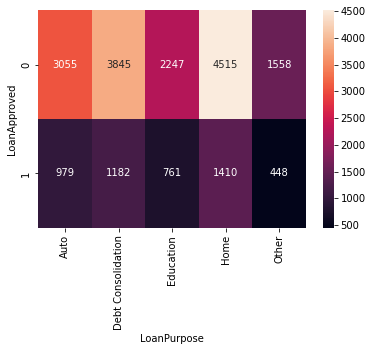

In [42]:
for col in categorial_features[1:]:
    plt.figure()
    sns.heatmap(pd.crosstab(df['LoanApproved'], df[col]), fmt='d', annot=True)
    plt.show()

Ne pas être employé semble être un facteur qui favorise la non-octrayance d'un prêt. De même pour le fait de ne pas être diplomé de l'université ou très peu (associate).

**H0 :** Les distributions sont identiques entre les populations

**H1 :** Elles ne le sont pas

In [43]:
from scipy.stats import chi2_contingency
for col in categorial_features[1:]:
    g_neg = df[negative][col].value_counts().values.tolist()
    g_pos = df[positive][col].value_counts().values.tolist()
    matrice = [g_neg, g_pos]
    stat, pval, d, expect = chi2_contingency(matrice)
    #print(expect) # Pas de valeurs attendues < 5
    alpha = 0.05
    if pval < alpha:
        print(f'{col:-<40} pval : {pval:.4f} \033[1mH0 rejetée\033[0m')
    else:
        print(f'{col:-<40} pval : {pval:.4f} \033[1m0\033[0m')

EmploymentStatus------------------------ pval : 0.0000 H0 rejetée
EducationLevel-------------------------- pval : 0.0000 H0 rejetée
MaritalStatus--------------------------- pval : 0.6190 0
HomeOwnershipStatus--------------------- pval : 0.0000 H0 rejetée
LoanPurpose----------------------------- pval : 0.1529 0


Pour les variables 'EmploymentStatus', 'EducationLevel' et 'HomeOwnershipStatus', la distribution entre les deux populations est significativement différente.

### Relations variables/variables

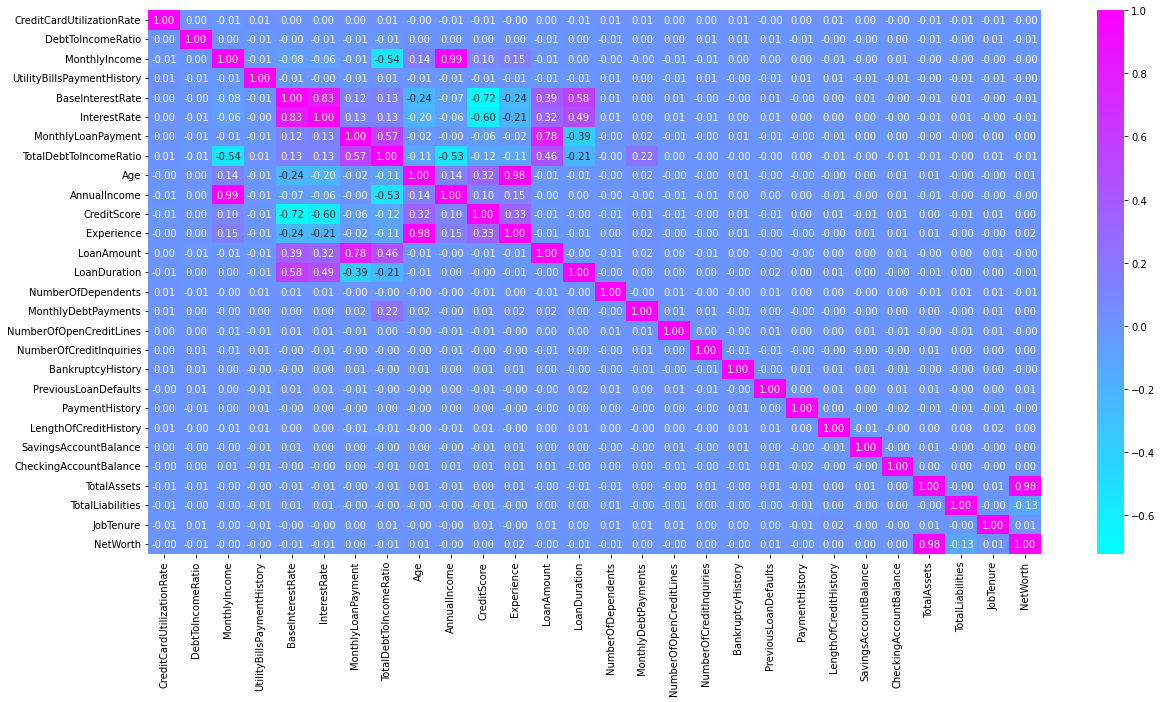

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(df[continuous_features+integer_features].corr(), annot=True, cmap='cool', fmt=".2f")
plt.show()

- 'InterestRate' : forte corrélation avec 'BaseInterestRate', corrélation positive avec la taille et la durée de remboursement du prêt, corrélation négative avec le score de remboursement
- 'MonlyLoanPayment' : forte corrélation avec la taille du prêt, corrélation avec le ratio dettes totales/revenus, corrélation négative avec la durée de remboursement du prêt
- 'TotalDebtToIncomeRatio' : corrélation négative avec les revenu mensuel/annuel et la durée du prêt, corrélation positive avec la taille du prêt, les payements mensuels de dettes et le coût mensuel du prêt
- 'Age' : très forte corrélation avec l'expérience, corrélation positive avec le score de remboursement et corrélation négative avec les taux d'intérêts
- 'AnnualIncome' : forte corrélation avec 'MonthlyIncome'
- 'CreditScore' : corrélation négative avec les taux d'intérêts et positive avec l'âge/expérience
- 'LoanAmount' : corrélation positive avec les taux d'intérêts, le coût mensuel du prêt et le TDTIR
- 'LoanDuration' : corrélation positive avec les taux d'intérêts et corrélation négative avec le coût mensuel du prêt et le TDTIR
- 'MonthlyDebtPayments' : corrélation positive avec le TDTIR
- 'NetWorth' : forte corrélation avec 'TotalAssets' et corrélation négative avec 'TotalLiabilites', logique car en théorie $\text{NetWorth}= \text{TotalAssets}- \text{TotalLiabilities}$ 
- 'DebtToIncomeRatio' : pas de corrélation avec les autres variables, étrange et attendu, à supprimer

In [ ]:
(df['TotalAssets'] - df['TotalLiabilities'] - df['NetWorth']).value_counts()

La relation $\text{NetWorth}= \text{TotalAssets}- \text{TotalLiabilities}$ est vraie pour 75% du dataset, il y a un problème quelque part. En théorie cette colonne peut être supprimée car elle n'apporte pas plus d'information : il s'agit d'une simple soustraction de variables et il y a en plus dans ce dataset 25% de valeurs étranges.

Supprimer les variables suivantes aura de grandes chances d'améliorer les futures modèles de prédictions : ['ApplicationDate', 'Experience', 'MonthlyIncome', 'DebtToIncomeRatio', 'NetWorth'].

On peut également se pencher sur les variables ['CreditCardUtilizationRate', 'UtilityBillsPaymentHistory'] grâce aux résultats des différents tests KS et les variables ['MaritalStatus', 'LoanPurpose'] avec les tests d'homogénéité du $\chi^2$.

# 2. Pre-processing des données

## Méthodologie (prédiction de la variable binaire)

- Colonnes catégorielles à encoder
- Colonnes entières et continues à normaliser
- Entrainer un modèle puis le valider par CV
- Réessayer en supprimant les variables énoncées plus haut

Une pipeline doit être créée pour normaliser les training set issus des folds de CV et appliquer la transformation avec les $\mu$ et $\sigma$ obtenus sur les validation set. 

On aimerait minimiser le taux de faux positifs.

In [640]:
df_pp = df.copy()
df_pp.drop('ApplicationDate', axis = 1, inplace=True)

In [641]:
cols_to_remove = ['Experience', 'MonthlyIncome', 'DebtToIncomeRatio', 'NetWorth', 'CreditCardUtilizationRate', 'UtilityBillsPaymentHistory']
cols_to_rm_lr = ['NumberOfDependents']

df_pp.drop(cols_to_remove + cols_to_rm_lr,axis=1,inplace=True) 
df_pp['BankruptcyHistory'] = df_pp['BankruptcyHistory'].replace({0: 'No', 1: 'Yes'})
df_pp['PreviousLoanDefaults'] = df_pp['PreviousLoanDefaults'].replace({0: 'No', 1: 'Yes'})
df_pp

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,HomeOwnershipStatus,MonthlyDebtPayments,NumberOfOpenCreditLines,NumberOfCreditInquiries,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,JobTenure,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,Employed,Master,13152,48,Married,Own,183,1,2,No,Home,No,29,9,7632,1202,146111,19183,11,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,Employed,Associate,26045,48,Single,Mortgage,496,5,3,No,Debt Consolidation,No,21,9,4627,3460,53204,9595,3,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,Employed,Bachelor,17627,36,Married,Rent,902,2,0,No,Education,No,20,22,886,895,25176,128874,6,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,Employed,High School,37898,96,Single,Mortgage,755,2,1,No,Home,No,27,10,1675,1217,104822,5370,5,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,Employed,Associate,9184,36,Married,Mortgage,274,0,0,No,Debt Consolidation,No,26,27,1555,4981,244305,17286,5,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,Employed,High School,24521,36,Married,Rent,673,5,1,No,Auto,No,21,7,235,3429,80969,25642,1,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,56,49246,567,Employed,Associate,25818,36,Married,Rent,414,2,0,No,Debt Consolidation,No,30,28,6910,183,69571,5569,3,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,44,48958,645,Employed,Bachelor,37033,72,Married,Mortgage,512,3,1,No,Home,No,28,8,2175,746,108316,4653,3,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,60,41025,560,Employed,High School,14760,72,Married,Own,986,4,1,No,Debt Consolidation,No,17,13,3037,260,22085,11485,5,0.249760,0.264873,411.168284,0.408678,0,59.0


In [642]:
continuous_features_pp = df_pp.select_dtypes('float').columns[:-1].tolist() # Ne pas prendre la target continue
integer_features_pp = df_pp.select_dtypes('int').columns[:-1].tolist() # Ne pas prendre la target discrète
categorial_features_pp = df_pp.select_dtypes('object').columns.tolist()

In [643]:
from sklearn.model_selection import train_test_split
set_clf, set_rg = train_test_split(df_pp, test_size = 0.5, random_state = 0)
train_set_clf, test_set_clf = train_test_split(set_clf, test_size = 0.2, random_state = 0)
train_set_rg, test_set_rg = train_test_split(set_rg, test_size = 0.2, random_state = 0)

In [644]:
print(train_set_clf['LoanApproved'].value_counts())
print(test_set_clf['LoanApproved'].value_counts())

0    6119
1    1881
Name: LoanApproved, dtype: int64
0    1488
1     512
Name: LoanApproved, dtype: int64


### Encodage

In [645]:
categorial_features_pp

['EmploymentStatus',
 'EducationLevel',
 'MaritalStatus',
 'HomeOwnershipStatus',
 'BankruptcyHistory',
 'LoanPurpose',
 'PreviousLoanDefaults']

In [646]:
def encodage(df_train, df_test):
    df_train = pd.get_dummies(df_train, columns=categorial_features_pp, drop_first=True)
    df_test = pd.get_dummies(df_test, columns=categorial_features_pp, drop_first=True)
    df_test = df_test.reindex(columns=df_train.columns, fill_value=0)
    return df_train, df_test

### Feature engineering

In [647]:
log_features = ['LoanAmount', 'MonthlyDebtPayments', 'SavingsAccountBalance', 'TotalAssets', 'TotalLiabilities']

In [648]:
def feature_engineering(df_train, df_test):
    df_train[log_features] = np.log(df_train[log_features])
    df_test[log_features] = np.log(df_test[log_features])
    return df_train, df_test

In [649]:
# Les résultats sont pires en transformant les variables qui suivent des lois log-normales

### Pre-processing

In [650]:
def preprocessing(df_train, df_test):
    df_train, df_test = encodage(df_train, df_test)
    #df_train, df_test = feature_engineering(df_train, df_test)
    
    X_train = df_train.drop(['LoanApproved', 'RiskScore'], axis=1)
    Y_train = df_train['LoanApproved']
    Score_train = df_train['RiskScore']/100
    
    X_test = df_test.drop(['LoanApproved', 'RiskScore'], axis=1)
    Y_test = df_test['LoanApproved']
    Score_test = df_test['RiskScore']/100
    return(X_train, Y_train, Score_train, X_test, Y_test, Score_test)

In [744]:
X_train_clf, Y_train_clf, Score_train_clf, X_test_clf, Y_test_clf, Score_test_clf = preprocessing(train_set_clf, test_set_clf)

In [745]:
X_train_rg, Y_train_rg, Score_train_rg, X_test_rg, Y_test_rg, Score_test_rg = preprocessing(train_set_rg, test_set_rg)

In [653]:
X_train_clf

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MonthlyDebtPayments,NumberOfOpenCreditLines,NumberOfCreditInquiries,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,JobTenure,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,BankruptcyHistory_Yes,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,PreviousLoanDefaults_Yes
1877,37,30209,530,29777,96,554,2,2,22,2,218,1080,147066,46291,5,0.299777,0.322082,867.449339,0.564646,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4997,77,94523,663,28850,96,305,2,1,26,5,7138,3648,244206,11342,0,0.232350,0.265022,726.363443,0.130935,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
13522,55,63935,588,42044,48,424,2,2,25,4,8746,1100,12980,65264,8,0.243044,0.246448,1385.740838,0.339671,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
15543,30,46453,452,21162,72,372,1,2,15,26,8533,1612,37388,26211,6,0.310162,0.299661,636.178047,0.260438,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
4859,38,15000,513,25546,36,252,1,2,32,19,384,2525,167412,51771,2,0.254046,0.278120,1054.080728,1.044865,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19281,52,50870,536,11324,36,341,3,0,23,6,11346,5501,47504,33821,8,0.228324,0.198425,419.932421,0.179500,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
12028,23,101892,482,38161,24,157,4,1,20,6,1253,4000,34920,24493,5,0.272161,0.278276,2091.248768,0.264780,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
17391,53,25128,536,40850,36,516,2,1,24,22,29196,3606,53292,11576,4,0.257850,0.215799,1551.216518,0.987209,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
9680,35,50220,604,19533,48,391,2,1,27,1,11492,356,22534,111348,4,0.212533,0.209724,604.563254,0.237888,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0


In [654]:
X_test_clf

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MonthlyDebtPayments,NumberOfOpenCreditLines,NumberOfCreditInquiries,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,JobTenure,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,BankruptcyHistory_Yes,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,PreviousLoanDefaults_Yes
9114,40,61486,485,30257,60,373,2,1,20,24,543,2981,56837,19012,2,0.292757,0.327523,1030.677782,0.273951,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
11038,41,45566,655,11595,60,273,1,0,31,8,323,3180,53235,10537,5,0.189095,0.202762,308.981166,0.153267,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
18956,43,51679,598,25437,48,658,5,0,18,15,3901,256,204246,16163,4,0.221437,0.210933,788.951114,0.335986,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2616,31,33748,497,24855,36,540,5,2,30,4,1362,3306,524152,22938,6,0.261355,0.227109,958.388431,0.532792,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
2950,54,27955,594,38411,60,624,2,1,26,3,15271,203,40296,20146,6,0.246411,0.247578,1121.966777,0.749476,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,50,56468,572,26281,24,1284,2,2,24,14,4286,2891,32376,33440,6,0.215281,0.214190,1355.881198,0.561000,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
10105,33,99545,572,26613,36,672,3,1,22,27,1262,1884,4857,2569,2,0.225613,0.184550,968.208462,0.197725,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
13263,42,52773,608,11633,24,931,3,2,30,5,2028,954,65075,23190,7,0.182633,0.177774,579.516383,0.343475,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
15197,39,32145,564,26475,60,448,2,0,19,2,302,188,209736,139044,6,0.249475,0.254466,784.022724,0.459924,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


### Création de la pipeline

In [655]:
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [656]:
class Normalisation(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
        
    def fit(self, X, y=None):
        self.scaler.fit(X[integer_features_pp + continuous_features_pp])
        return self

    def transform(self, X):
        X_res = X.copy()
        X_res[integer_features_pp + continuous_features_pp] = self.scaler.transform(X_res[integer_features_pp + continuous_features_pp])
        return X_res

In [657]:
pipeline_dt = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', DecisionTreeClassifier(max_depth=20,random_state = 0))
])

## Premier modèle

In [658]:
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [659]:
def evaluation(model, x_train, y_train):    
    N, train_scores, test_scores = learning_curve(model, x_train, y_train, 
                                                  train_sizes=np.linspace(0.1,1,10), cv=5, scoring='f1')
    plt.figure(figsize=(12,8))
    plt.plot(N, train_scores.mean(axis=1), label='Train score')
    plt.plot(N,test_scores.mean(axis=1), label='Validation score')
    plt.xlabel('N')
    plt.ylabel('f1')
    plt.grid()
    plt.legend()
    plt.show()

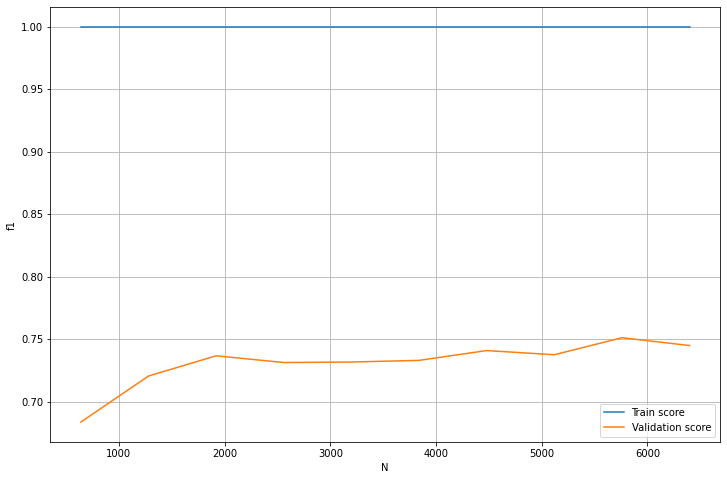

In [660]:
evaluation(pipeline_dt, X_train_clf, Y_train_clf)

In [661]:
pipeline_dt.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_dt.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1488
           1       0.78      0.75      0.77       512

    accuracy                           0.88      2000
   macro avg       0.85      0.84      0.84      2000
weighted avg       0.88      0.88      0.88      2000



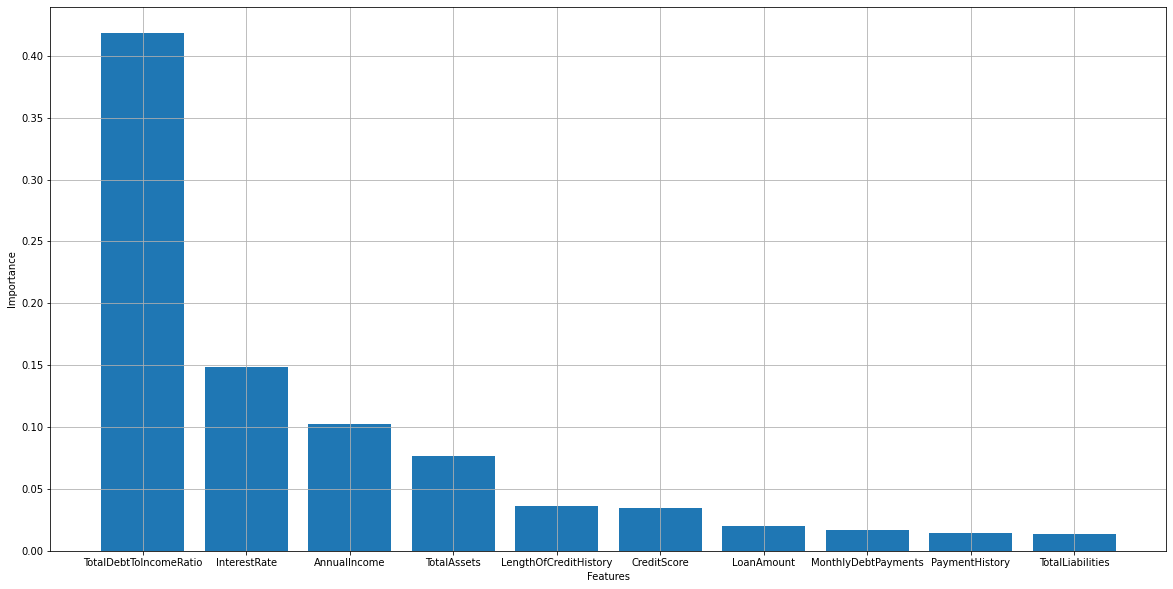

In [662]:
model_dt = pipeline_dt.named_steps['classifier']
importances = model_dt.feature_importances_
feature_importance = pd.Series(importances, index=X_train_clf.columns).sort_values(ascending=False)
top_10_features = feature_importance.head(10)
plt.figure(figsize=(20,10))
plt.bar(top_10_features.index, top_10_features.values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid()
plt.show()

# 3. Modélisation

## 3.1 Prédiction de la variable binaire

### Régression logistique

In [663]:
from sklearn.linear_model import LogisticRegression

In [664]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', LogisticRegression())
])

param_distributions = {
    'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg'],
    'classifier__C' : [1,2,5,10]}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=200,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=200. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Meilleurs paramètres :  {'classifier__solver': 'lbfgs', 'classifier__C': 10}
Meilleur score :  0.9161527804341819


In [665]:
pipeline_lr = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [666]:
pipeline_lr.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_lr.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1488
           1       0.93      0.93      0.93       512

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000



In [667]:
# Le f1 score avec variables inutiles était 0.93

#### Odds ratios

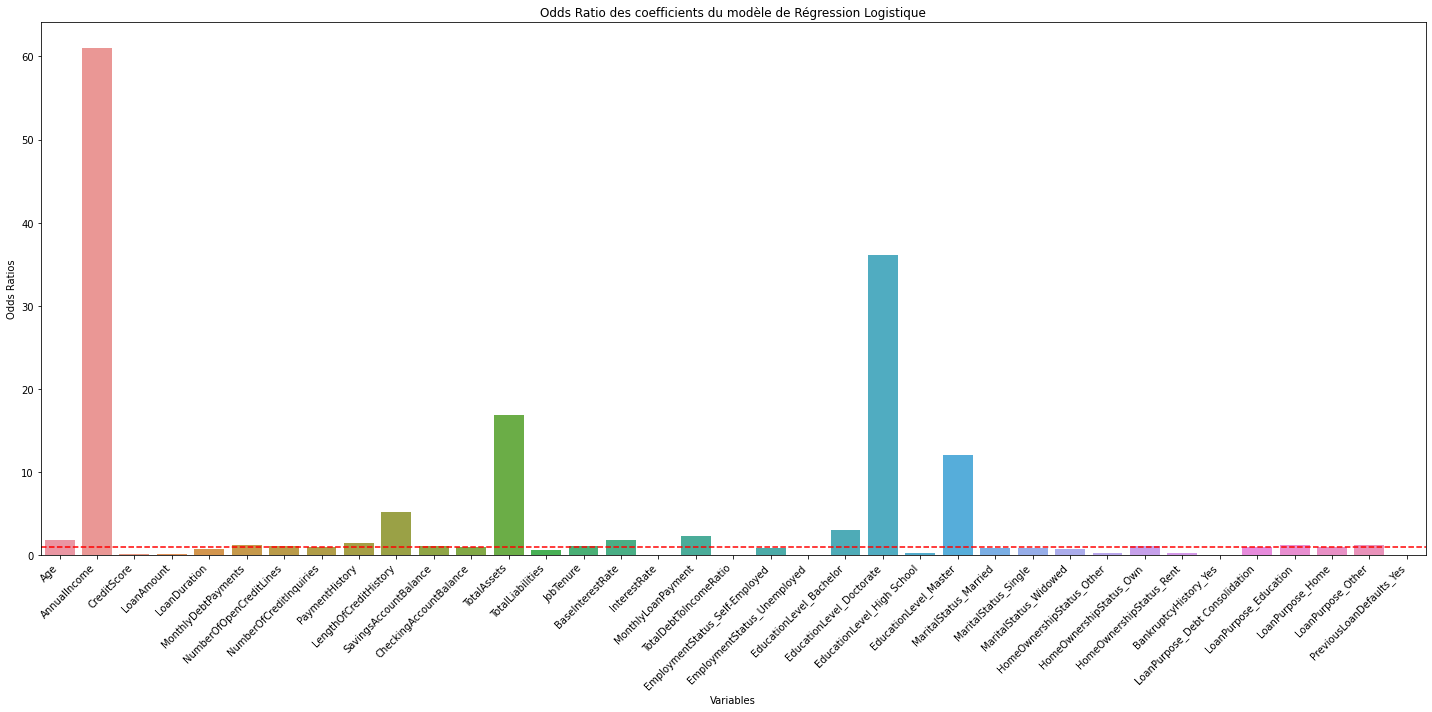

In [668]:
model_lr = pipeline_lr.named_steps['classifier']

odds_ratios = np.exp(model_lr.coef_[0])
plt.figure(figsize=(20, 10))  
sns.barplot(x=X_train_clf.columns, y=odds_ratios)
plt.xlabel('Variables')
plt.ylabel('Odds Ratios')
plt.title('Odds Ratio des coefficients du modèle de Régression Logistique')
plt.axhline(1, color='red', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

In [669]:
odds_ratios_df = pd.DataFrame({
    'Variable': X_train_clf.columns,
    'Odds Ratio': odds_ratios
})
threshold = 0.02
insignificant_vars = odds_ratios_df[(odds_ratios_df['Odds Ratio'] >= 1 - threshold) & 
                                    (odds_ratios_df['Odds Ratio'] <= 1 + threshold)]
print("Variables qui n'ont pas d'impact significatif sur la décision :")
print(insignificant_vars['Variable'].tolist())

Variables qui n'ont pas d'impact significatif sur la décision :
['CheckingAccountBalance', 'LoanPurpose_Debt Consolidation']


#### Avant suppression des variables inutiles
Beaucoup de variables que ne servent à rien sans feature selection, donc on supprime tout les colonnes inutiles (cols_to_remove)
#### Après suppression
['NumberOfDependents']

### KNN

In [371]:
from sklearn.neighbors import KNeighborsClassifier

In [673]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', KNeighborsClassifier())
])

param_distributions = {
    'classifier__n_neighbors' : [i for i in range(3,17,2)]}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=200,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 7 is smaller than n_iter=200. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Meilleurs paramètres :  {'classifier__n_neighbors': 15}
Meilleur score :  0.696508620405852


In [674]:
pipeline_knn = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [675]:
pipeline_knn.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_knn.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1488
           1       0.95      0.58      0.72       512

    accuracy                           0.88      2000
   macro avg       0.91      0.78      0.82      2000
weighted avg       0.89      0.88      0.87      2000



### Forêts aléatoires

In [683]:
from sklearn.ensemble import RandomForestClassifier

In [684]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', RandomForestClassifier(random_state=0))
])

param_distributions = {
    'classifier__n_estimators': [100,125,150],
    'classifier__max_features': [16,18,22,26],
    #'classifier__max_depth': [16,20,26]
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=200,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=200. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Meilleurs paramètres :  {'classifier__n_estimators': 125, 'classifier__max_features': 16}
Meilleur score :  0.8413272605695964


In [685]:
pipeline_rf = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [686]:
pipeline_rf.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_rf.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1488
           1       0.88      0.80      0.84       512

    accuracy                           0.92      2000
   macro avg       0.91      0.88      0.89      2000
weighted avg       0.92      0.92      0.92      2000



### SVM

In [687]:
from sklearn.svm import SVC
from scipy.stats import randint, uniform

In [688]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', SVC(random_state=0, probability=True))
])

param_distributions = {
    'classifier__C': [0.1,1,5],  
    'classifier__kernel': ['linear', 'rbf']}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=200,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=200. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Meilleurs paramètres :  {'classifier__kernel': 'linear', 'classifier__C': 0.1}
Meilleur score :  0.9144395475589173


In [689]:
pipeline_svc = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [690]:
pipeline_svc.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_svc.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1488
           1       0.94      0.91      0.92       512

    accuracy                           0.96      2000
   macro avg       0.95      0.94      0.95      2000
weighted avg       0.96      0.96      0.96      2000



### MLP

In [691]:
from sklearn.neural_network import MLPClassifier

In [692]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()), 
    ('classifier', MLPClassifier(random_state=0, max_iter=1000))
])

param_distributions = {
    'classifier__hidden_layer_sizes': [(32,), (32,8), (32,32)], 
    'classifier__activation': ['logistic'],         
    'classifier__solver': ['adam'],                 
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=100,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Meilleurs paramètres :  {'classifier__solver': 'adam', 'classifier__hidden_layer_sizes': (32,), 'classifier__activation': 'logistic'}
Meilleur score :  0.9037867422823517


In [693]:
pipeline_mlp = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [694]:
pipeline_mlp.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_mlp.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1488
           1       0.92      0.91      0.92       512

    accuracy                           0.96      2000
   macro avg       0.95      0.94      0.95      2000
weighted avg       0.96      0.96      0.96      2000



### XGB

In [261]:
import xgboost as xgb

In [695]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', xgb.XGBClassifier(random_state=0))
])

param_distributions = {
    'classifier__max_depth': [5, 6, 7, 8],
    'classifier__learning_rate': [0.01, 0.05, 0.1,],
    'classifier__colsample_bytree': [0.6, 0.7, 0.8],
    'classifier__n_estimators': [100,130,150]}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=50,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

Meilleurs paramètres :  {'classifier__n_estimators': 150, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.6}
Meilleur score :  0.8899728711336685


In [696]:
pipeline_xgb = ImbPipeline(steps=[
    ('normalisation', Normalisation()),     
    ('classifier', random_search.best_estimator_[-1])])
pipeline_xgb.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_xgb.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1488
           1       0.91      0.86      0.88       512

    accuracy                           0.94      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.94      0.94      0.94      2000



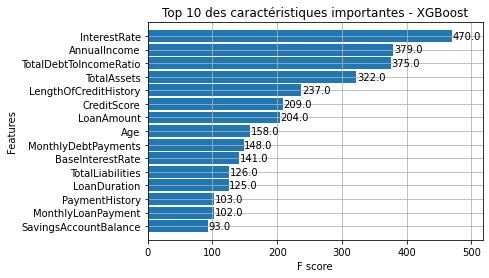

In [697]:
# Afficher l'importance des caractéristiques
xgb.plot_importance(pipeline_xgb.named_steps['classifier'], importance_type='weight', max_num_features=15, height=0.88)
plt.title('Top 10 des caractéristiques importantes - XGBoost')
plt.show()

### Stacking

In [698]:
from sklearn.ensemble import StackingClassifier

meta_model = LogisticRegression(C= 1, solver = 'lbfgs')

stacking_model = StackingClassifier(
    estimators=[('lr', pipeline_lr),
                ('rf', pipeline_rf),
                #('knn', pipeline_knn),
                ('svc', pipeline_svc),
                ('mlp', pipeline_mlp),
                ('xgb', pipeline_xgb)],
    final_estimator=meta_model,
    cv=5)

stacking_model.fit(X_train_clf, Y_train_clf)

y_pred = stacking_model.predict(X_test_clf)

print(classification_report(Y_test_clf, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1488
           1       0.93      0.92      0.93       512

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000



## ROC

#### Le seuil est ajusté afin de maximiser le score f1 ici.

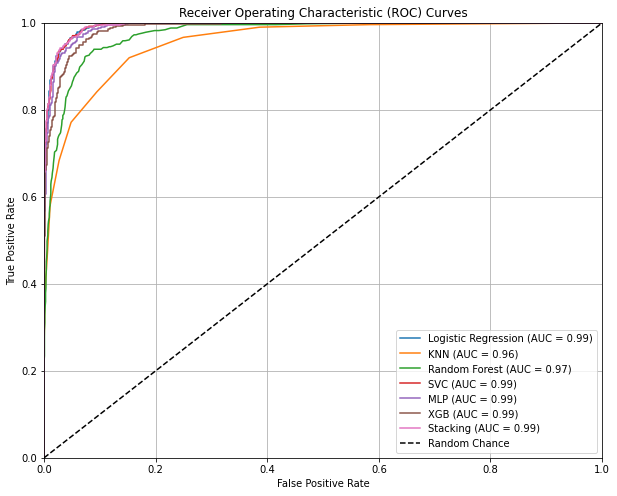

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1488
           1       0.94      0.92      0.93       512

    accuracy                           0.96      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000




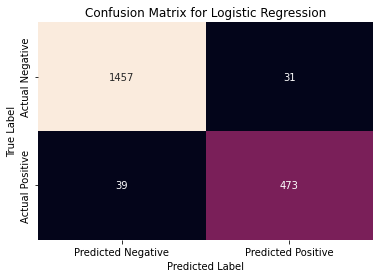

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1488
           1       0.85      0.77      0.81       512

    accuracy                           0.91      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.90      0.91      0.90      2000




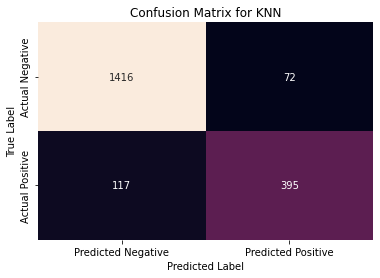

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1488
           1       0.81      0.92      0.86       512

    accuracy                           0.93      2000
   macro avg       0.89      0.92      0.91      2000
weighted avg       0.93      0.93      0.93      2000




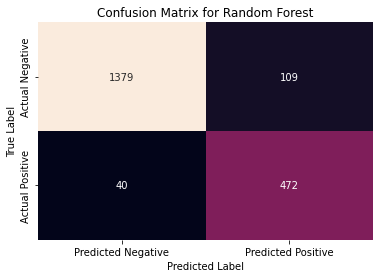

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1488
           1       0.93      0.93      0.93       512

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000




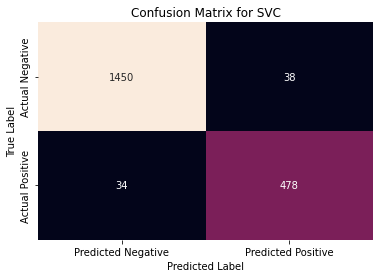

Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1488
           1       0.92      0.92      0.92       512

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000




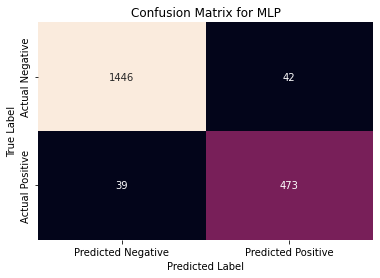

Classification Report for XGB:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1488
           1       0.88      0.92      0.90       512

    accuracy                           0.95      2000
   macro avg       0.92      0.94      0.93      2000
weighted avg       0.95      0.95      0.95      2000




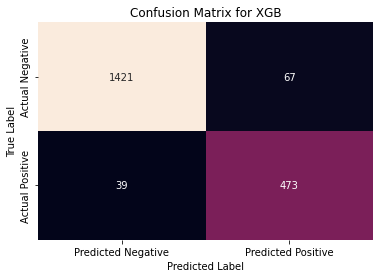

Classification Report for Stacking:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1488
           1       0.92      0.94      0.93       512

    accuracy                           0.96      2000
   macro avg       0.95      0.96      0.95      2000
weighted avg       0.96      0.96      0.96      2000




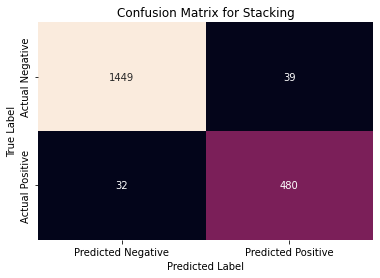

In [700]:
models = {
    'Logistic Regression': pipeline_lr,
    'KNN': pipeline_knn,
    'Random Forest': pipeline_rf,
    'SVC': pipeline_svc,
    'MLP': pipeline_mlp,
    'XGB': pipeline_xgb,
    'Stacking': stacking_model
}

roc_curves = {}
classification_reports = {}

for model_name, model in models.items():
    y_prob = model.predict_proba(X_test_clf)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(Y_test_clf, y_prob)
    roc_auc = auc(fpr, tpr)
    
    f1_scores = [f1_score(Y_test_clf, (y_prob >= threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[np.argmax(f1_scores)]
    
    y_pred = (y_prob >= best_threshold).astype(int)
    
    classification_reports[model_name] = classification_report(Y_test_clf, y_pred)
    
    roc_curves[model_name] = (fpr, tpr, roc_auc, best_threshold)

plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc, _) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

for model_name, report in classification_reports.items():
    print(f'Classification Report for {model_name}:\n{report}\n')
    
    y_pred = (models[model_name].predict_proba(X_test_clf)[:, 1] >= roc_curves[model_name][3]).astype(int)
    cm = confusion_matrix(Y_test_clf, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

c:\users\jmv\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


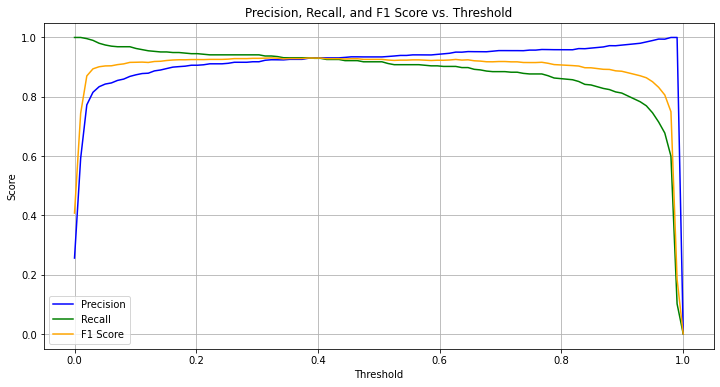

In [701]:
from sklearn.metrics import precision_score, recall_score
y_prob_stack = stacking_model.predict_proba(X_test_clf)[:, 1]  # Probabilité pour la classe positive

# Générer les seuils entre 0 et 1
thresholds = np.linspace(0, 1, 100)

# Stocker les valeurs de précision, rappel et F1-score pour chaque seuil
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred = (y_prob_stack >= threshold).astype(int)  # Conversion en classe prédite
    precision_scores.append(precision_score(Y_test_clf, y_pred))
    recall_scores.append(recall_score(Y_test_clf, y_pred))
    f1_scores.append(f1_score(Y_test_clf, y_pred))

# Tracer les courbes
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precision_scores, label='Precision', color='blue')
plt.plot(thresholds, recall_scores, label='Recall', color='green')
plt.plot(thresholds, f1_scores, label='F1 Score', color='orange')

# Ajouter des lignes de repère et des légendes
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend(loc='best')
plt.grid()
plt.show()

## 3.2 Prédiction de la variable binaire

### MLP

In [702]:
from sklearn.neural_network import MLPRegressor

In [703]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()), 
    ('classifier', MLPRegressor(random_state=0, max_iter=1000))
])

param_distributions = {
    'classifier__hidden_layer_sizes': [(32,32), (64,64), (64,32), (128,128), (128,64)], 
    'classifier__activation': ['logistic'],         
    'classifier__solver': ['adam'],                 
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='neg_mean_squared_error',   
    n_iter=100,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_rg, Score_train_rg)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=100. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Meilleurs paramètres :  {'classifier__solver': 'adam', 'classifier__hidden_layer_sizes': (32, 32), 'classifier__activation': 'logistic'}
Meilleur score :  -0.0018857261986234088


In [704]:
pipeline_mlp_rg = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [705]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
pipeline_mlp_rg.fit(X_train_rg, Score_train_rg)

y_pred = pipeline_mlp_rg.predict(X_test_rg)

mse = mean_squared_error(Score_test_rg, y_pred)
rmse = mean_squared_error(Score_test_rg, y_pred, squared=False)
mae = mean_absolute_error(Score_test_rg, y_pred)
r2 = r2_score(Score_test_rg, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.001757450371683599
Root Mean Squared Error (RMSE): 0.041921955723506016
Mean Absolute Error (MAE): 0.03363502776274319
R² Score: 0.71422681433838


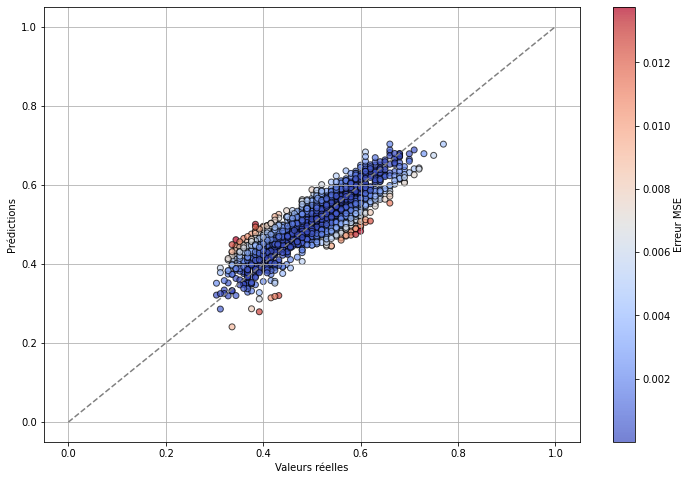

In [706]:
import matplotlib.pyplot as plt
import numpy as np

diff = (Score_test_rg - y_pred)**2

plt.figure(figsize=(12, 8))
scatter = plt.scatter(Score_test_rg, y_pred, c=diff, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.plot([0, 1], [0, 1], '--', color='gray')  
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.colorbar(scatter, label='Erreur MSE')
plt.grid(True)
plt.show()


### XGBoost

In [738]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', xgb.XGBRegressor(objective='reg:squarederror', random_state=0))
])

param_distributions = {
    'classifier__max_depth': [4, 5, 6, 7, 8],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__colsample_bytree': [0.5, 0.6, 0.7, 0.8],
    'classifier__n_estimators': [100, 150, 200, 250],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__reg_alpha': [0, 0.01, 0.1],
    'classifier__reg_lambda': [1, 1.5, 2],
    'classifier__min_child_weight': [1, 3, 5]
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='neg_mean_squared_error',   
    n_iter=100,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_rg, Y_train_rg)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

Meilleurs paramètres :  {'classifier__subsample': 0.8, 'classifier__reg_lambda': 1.5, 'classifier__reg_alpha': 0.01, 'classifier__n_estimators': 250, 'classifier__min_child_weight': 3, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.05, 'classifier__colsample_bytree': 0.7}
Meilleur score :  -0.046659933468963355


In [739]:
pipeline_xgb_rg = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [740]:
pipeline_xgb_rg.fit(X_train_rg, Score_train_rg)

y_pred = pipeline_xgb_rg.predict(X_test_rg)

mse = mean_squared_error(Score_test_rg, y_pred)
rmse = mean_squared_error(Score_test_rg, y_pred, squared=False)
mae = mean_absolute_error(Score_test_rg, y_pred)
r2 = r2_score(Score_test_rg, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.0013195571752929252
Root Mean Squared Error (RMSE): 0.0363257095635161
Mean Absolute Error (MAE): 0.02896287349021434
R² Score: 0.7854311770494776


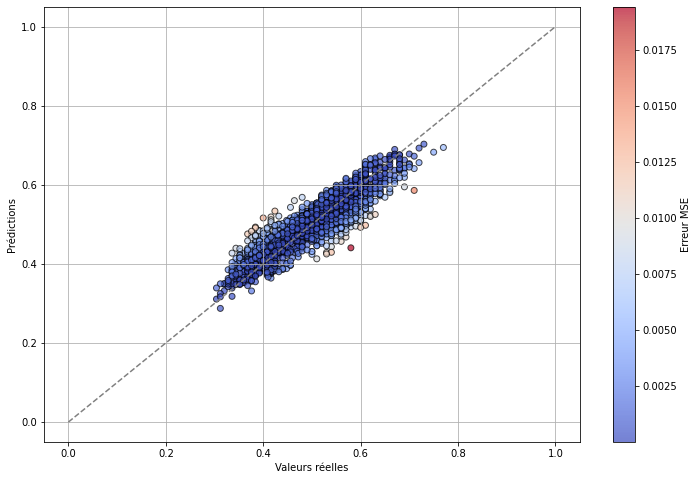

In [741]:
import matplotlib.pyplot as plt
import numpy as np

diff = (Score_test_rg - y_pred)**2

plt.figure(figsize=(12, 8))
scatter = plt.scatter(Score_test_rg, y_pred, c=diff, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.plot([0, 1], [0, 1], '--', color='gray')  
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.colorbar(scatter, label='Erreur MSE')
plt.grid(True)
plt.show()

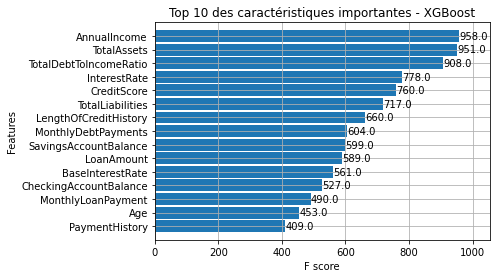

In [742]:
# Afficher l'importance des caractéristiques
xgb.plot_importance(pipeline_xgb_rg.named_steps['classifier'], importance_type='weight', max_num_features=15, height=0.88)
plt.title('Top 10 des caractéristiques importantes - XGBoost')
plt.show()

Le modèle avec XGBoost est sélectionné pour la suite

## 3.3 Prédiction de la variable binaire à l'aide du modèle prédictif de la variable continue

### Ajout du score de risque

In [746]:
X_train_clf['RiskScore'] = pipeline_xgb_rg.predict(X_train_clf)
X_test_clf['RiskScore'] = pipeline_xgb_rg.predict(X_test_clf)

In [747]:
X_train_clf

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MonthlyDebtPayments,NumberOfOpenCreditLines,NumberOfCreditInquiries,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,JobTenure,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,BankruptcyHistory_Yes,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,PreviousLoanDefaults_Yes,RiskScore
1877,37,30209,530,29777,96,554,2,2,22,2,218,1080,147066,46291,5,0.299777,0.322082,867.449339,0.564646,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.566425
4997,77,94523,663,28850,96,305,2,1,26,5,7138,3648,244206,11342,0,0.232350,0.265022,726.363443,0.130935,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.404715
13522,55,63935,588,42044,48,424,2,2,25,4,8746,1100,12980,65264,8,0.243044,0.246448,1385.740838,0.339671,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0.591137
15543,30,46453,452,21162,72,372,1,2,15,26,8533,1612,37388,26211,6,0.310162,0.299661,636.178047,0.260438,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0.574701
4859,38,15000,513,25546,36,252,1,2,32,19,384,2525,167412,51771,2,0.254046,0.278120,1054.080728,1.044865,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0.522577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19281,52,50870,536,11324,36,341,3,0,23,6,11346,5501,47504,33821,8,0.228324,0.198425,419.932421,0.179500,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0.509736
12028,23,101892,482,38161,24,157,4,1,20,6,1253,4000,34920,24493,5,0.272161,0.278276,2091.248768,0.264780,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.533300
17391,53,25128,536,40850,36,516,2,1,24,22,29196,3606,53292,11576,4,0.257850,0.215799,1551.216518,0.987209,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0.538818
9680,35,50220,604,19533,48,391,2,1,27,1,11492,356,22534,111348,4,0.212533,0.209724,604.563254,0.237888,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0.560013


### Régression logistique

In [808]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', LogisticRegression())
])

param_distributions = {
    'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg'],
    'classifier__C' : [1,2,5,10]}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=200,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=200. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Meilleurs paramètres :  {'classifier__solver': 'liblinear', 'classifier__C': 10}
Meilleur score :  0.9178670178272228


In [809]:
pipeline_lr_clf = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [810]:
pipeline_lr_clf.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_lr_clf.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1488
           1       0.93      0.92      0.92       512

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000



### KNN

In [751]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', KNeighborsClassifier())
])

param_distributions = {
    'classifier__n_neighbors' : [i for i in range(3,17,2)]}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=200,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 7 is smaller than n_iter=200. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Meilleurs paramètres :  {'classifier__n_neighbors': 7}
Meilleur score :  0.6976231182358849


In [752]:
pipeline_knn_clf = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [753]:
pipeline_knn_clf.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_knn_clf.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1488
           1       0.89      0.62      0.73       512

    accuracy                           0.88      2000
   macro avg       0.88      0.79      0.83      2000
weighted avg       0.88      0.88      0.87      2000



### Forêts aléatoires

In [811]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', RandomForestClassifier(random_state=0))
])

param_distributions = {
    'classifier__n_estimators': [100,125,150],
    'classifier__max_features': [16,18,22,26],
    #'classifier__max_depth': [16,20,26]
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=200,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=200. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Meilleurs paramètres :  {'classifier__n_estimators': 125, 'classifier__max_features': 18}
Meilleur score :  0.869316585798615


In [812]:
pipeline_rf_clf = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [813]:
pipeline_rf_clf.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_rf_clf.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1488
           1       0.90      0.84      0.87       512

    accuracy                           0.94      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.94      0.94      0.94      2000



### SVC

In [814]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', SVC(random_state=0, probability=True))
])

param_distributions = {
    'classifier__C': [0.1,1,5],  
    'classifier__kernel': ['linear', 'rbf']}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=200,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=200. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Meilleurs paramètres :  {'classifier__kernel': 'linear', 'classifier__C': 5}
Meilleur score :  0.9150707589542352


In [815]:
pipeline_svc_clf = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [816]:
pipeline_svc_clf.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_svc_clf.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1488
           1       0.92      0.93      0.92       512

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000



### MLP

In [760]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()), 
    ('classifier', MLPClassifier(random_state=0, max_iter=1000))
])

param_distributions = {
    'classifier__hidden_layer_sizes': [(32,), (32,8), (32,32),(32,16)], 
    'classifier__activation': ['logistic'],         
    'classifier__solver': ['adam'],                 
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=100,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

c:\users\jmv\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Meilleurs paramètres :  {'classifier__solver': 'adam', 'classifier__hidden_layer_sizes': (32,), 'classifier__activation': 'logistic'}
Meilleur score :  0.9090088776055539


In [761]:
pipeline_mlp_clf = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', random_search.best_estimator_[-1])])

In [762]:
pipeline_mlp_clf.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_mlp_clf.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1488
           1       0.93      0.90      0.91       512

    accuracy                           0.96      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.96      0.96      0.96      2000



### XGBoost

In [817]:
pipeline = ImbPipeline(steps=[
    ('normalisation', Normalisation()),
    ('classifier', xgb.XGBClassifier(random_state=0))
])

param_distributions = {
    'classifier__max_depth': [4, 5, 6, 7, 8],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__colsample_bytree': [0.5, 0.6, 0.7, 0.8],
    'classifier__n_estimators': [100, 150, 200, 250],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__reg_alpha': [0, 0.01, 0.1],
    'classifier__reg_lambda': [1, 1.5, 2],
    'classifier__min_child_weight': [1, 3, 5]
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='f1',   
    n_iter=50,           
    cv=5,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train_clf, Y_train_clf)
print("Meilleurs paramètres : ", random_search.best_params_)
print("Meilleur score : ", random_search.best_score_)

Meilleurs paramètres :  {'classifier__subsample': 0.6, 'classifier__reg_lambda': 2, 'classifier__reg_alpha': 0, 'classifier__n_estimators': 250, 'classifier__min_child_weight': 3, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.7}
Meilleur score :  0.9017875174403513


In [818]:
pipeline_xgb_clf = ImbPipeline(steps=[
    ('normalisation', Normalisation()),     
    ('classifier', random_search.best_estimator_[-1])])
pipeline_xgb_clf.fit(X_train_clf, Y_train_clf)
print(classification_report(Y_test_clf, pipeline_xgb_clf.predict(X_test_clf)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1488
           1       0.93      0.89      0.91       512

    accuracy                           0.95      2000
   macro avg       0.94      0.93      0.94      2000
weighted avg       0.95      0.95      0.95      2000



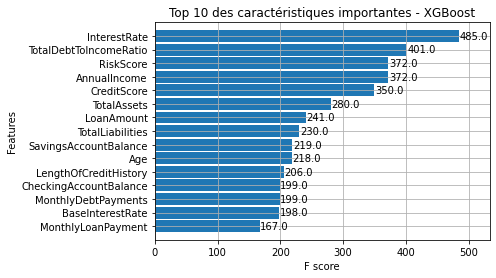

In [819]:
# Afficher l'importance des caractéristiques
xgb.plot_importance(pipeline_xgb_clf.named_steps['classifier'], importance_type='weight', max_num_features=15, height=0.88)
plt.title('Top 10 des caractéristiques importantes - XGBoost')
plt.show()

### Stacking

In [820]:
from sklearn.ensemble import StackingClassifier

meta_model = LogisticRegression(C= 1, solver = 'lbfgs')

stacking_model_clf = StackingClassifier(
    estimators=[('lr', pipeline_lr_clf),
                ('rf', pipeline_rf_clf),
                #('knn', pipeline_knn),
                ('svc', pipeline_svc_clf),
                ('mlp', pipeline_mlp_clf),
                ('xgb', pipeline_xgb_clf)],
    final_estimator=meta_model,
    cv=5)

stacking_model_clf.fit(X_train_clf, Y_train_clf)

y_pred = stacking_model_clf.predict(X_test_clf)

print(classification_report(Y_test_clf, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1488
           1       0.93      0.91      0.92       512

    accuracy                           0.96      2000
   macro avg       0.95      0.94      0.95      2000
weighted avg       0.96      0.96      0.96      2000



## ROC

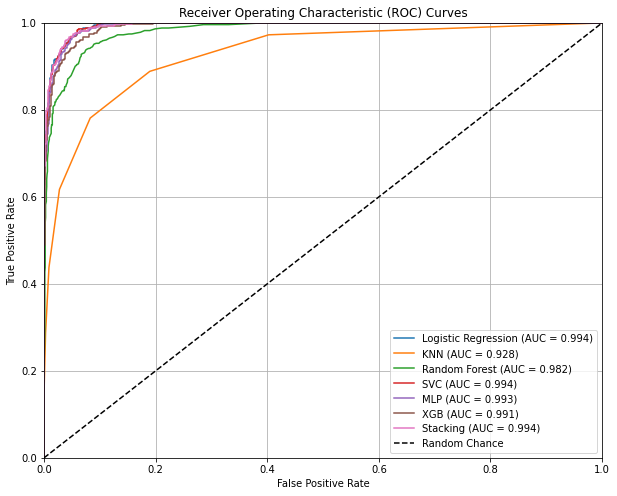

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1488
           1       0.94      0.92      0.93       512

    accuracy                           0.96      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000




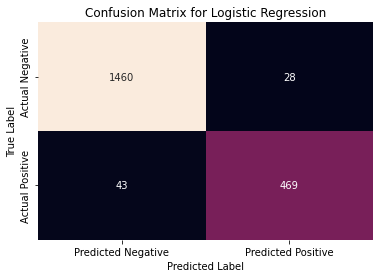

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1488
           1       0.76      0.78      0.77       512

    accuracy                           0.88      2000
   macro avg       0.84      0.85      0.85      2000
weighted avg       0.88      0.88      0.88      2000




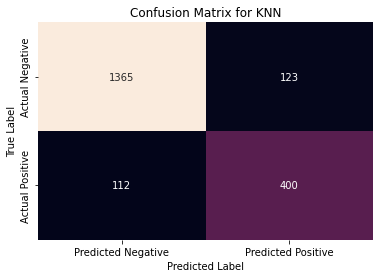

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1488
           1       0.83      0.93      0.87       512

    accuracy                           0.93      2000
   macro avg       0.90      0.93      0.91      2000
weighted avg       0.94      0.93      0.93      2000




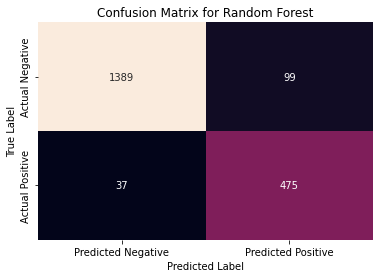

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1488
           1       0.91      0.94      0.93       512

    accuracy                           0.96      2000
   macro avg       0.95      0.96      0.95      2000
weighted avg       0.96      0.96      0.96      2000




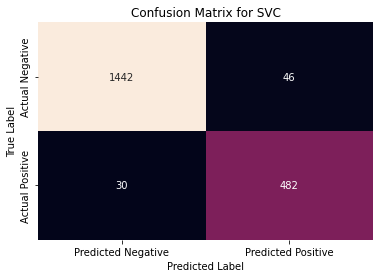

Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1488
           1       0.91      0.93      0.92       512

    accuracy                           0.96      2000
   macro avg       0.94      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000




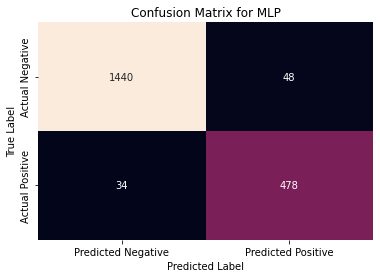

Classification Report for XGB:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1488
           1       0.91      0.91      0.91       512

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000




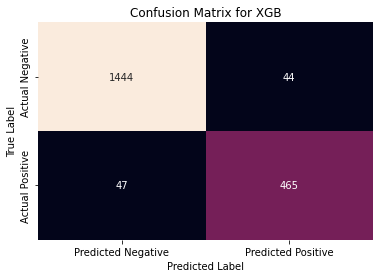

Classification Report for Stacking:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1488
           1       0.92      0.94      0.93       512

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000




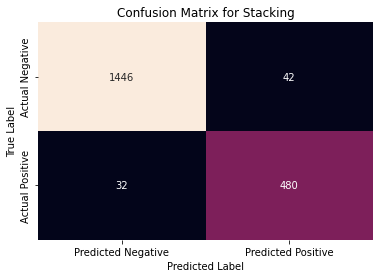

In [821]:
models = {
    'Logistic Regression': pipeline_lr_clf,
    'KNN': pipeline_knn_clf,
    'Random Forest': pipeline_rf_clf,
    'SVC': pipeline_svc_clf,
    'MLP': pipeline_mlp_clf,
    'XGB': pipeline_xgb_clf,
    'Stacking': stacking_model_clf
}

roc_curves = {}
classification_reports = {}

for model_name, model in models.items():
    y_prob = model.predict_proba(X_test_clf)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(Y_test_clf, y_prob)
    roc_auc = auc(fpr, tpr)
    
    f1_scores = [f1_score(Y_test_clf, (y_prob >= threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[np.argmax(f1_scores)]
    
    y_pred = (y_prob >= best_threshold).astype(int)
    
    classification_reports[model_name] = classification_report(Y_test_clf, y_pred)
    
    roc_curves[model_name] = (fpr, tpr, roc_auc, best_threshold)

plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc, _) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

for model_name, report in classification_reports.items():
    print(f'Classification Report for {model_name}:\n{report}\n')
    
    y_pred = (models[model_name].predict_proba(X_test_clf)[:, 1] >= roc_curves[model_name][3]).astype(int)
    cm = confusion_matrix(Y_test_clf, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

En conclusion, l'ajout des prédictions du score de risque n'a pas amélioré les modèles de prise de décision pour le prêt qui fonctionnent déjà très bien.